#### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Understanding

In [ ]:
# Load dataset setelah di-upload
df = pd.read_csv("aug_train.csv")  # Sesuaikan dengan nama file yang di-upload
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
df = df.drop(columns=['company_size', 'company_type','enrollee_id'])
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   last_new_job            18735 non-null  object 
 9   training_hours          19158 non-null  int64  
 10  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.6+ MB


np.int64(306)

##### Cek MIssing Value

In [ ]:
# 1. Mengecek Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0]
print("Missing Values:")
print(missing_data)

Missing Values:
                     Missing Values  Percentage
gender                         4508   23.530640
enrolled_university             386    2.014824
education_level                 460    2.401086
major_discipline               2813   14.683161
experience                       65    0.339284
last_new_job                    423    2.207955


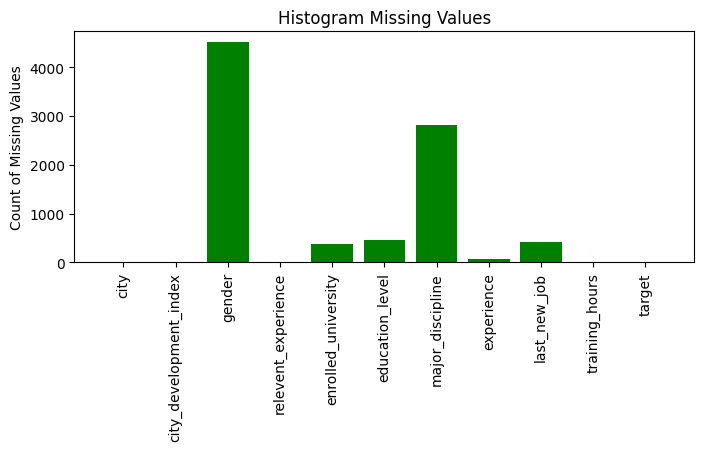

In [ ]:
# Plot histogram missing value
plt.figure(figsize=(8, 3))
plt.bar(missing_values.index, missing_values.values, color='green')
plt.xticks(rotation=90)
plt.ylabel("Count of Missing Values")
plt.title("Histogram Missing Values")
plt.show()

##### Cek Inconsistent Entries

In [ ]:
# 2. Mengecek Inconsistent Entries
print("\nUnique values in categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()[:10]}")

# Mengganti 'never' menjadi 0 pada kolom 'last_new_job'
df['last_new_job'] = df['last_new_job'].replace('never', 0)


Unique values in categorical columns:
city: ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114']
gender: ['Male' nan 'Female' 'Other']
relevent_experience: ['Has relevent experience' 'No relevent experience']
enrolled_university: ['no_enrollment' 'Full time course' nan 'Part time course']
education_level: ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
major_discipline: ['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
experience: ['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16']
last_new_job: ['1' '>4' 'never' '4' '3' '2' nan]


##### Cek Outlier

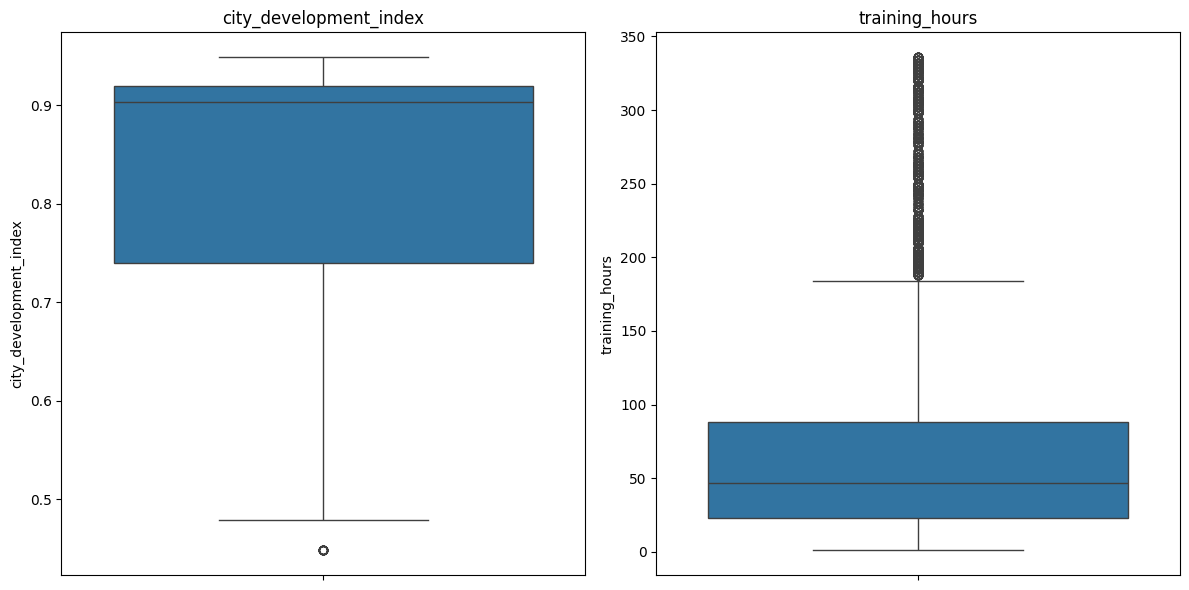


Jumlah outliers per kolom:
{'city_development_index': 17, 'training_hours': 984, 'target': 4777}


In [ ]:
# 3. Mendeteksi Outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_cols[:2]):  # Ambil 2 kolom numerik pertama sebagai contoh
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Menggunakan IQR untuk mendeteksi outlier
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outlier_counts = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

print("\nJumlah outliers per kolom:")
print(outlier_counts)

#### EDA

In [ ]:
#ringkasan statistik dataset
print("\n=== Ringkasan Statistik Dataset ===")
print(df.describe(include='all'))

# Memisahkan kolom numerik dan kategori
numeric_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(include=['object'])

# Statistik deskriptif untuk kolom numerik
print("Descriptive Statistics for Numerical Columns:")
print(numeric_cols.describe())

# Statistik deskriptif untuk kolom kategori
print("\nDescriptive Statistics for Categorical Columns:")
print(categorical_cols.describe(include='object'))


=== Ringkasan Statistik Dataset ===
            city  city_development_index gender      relevent_experience  \
count      19158            19158.000000  14650                    19158   
unique       123                     NaN      3                        2   
top     city_103                     NaN   Male  Has relevent experience   
freq        4355                     NaN  13221                    13792   
mean         NaN                0.828848    NaN                      NaN   
std          NaN                0.123362    NaN                      NaN   
min          NaN                0.448000    NaN                      NaN   
25%          NaN                0.740000    NaN                      NaN   
50%          NaN                0.903000    NaN                      NaN   
75%          NaN                0.920000    NaN                      NaN   
max          NaN                0.949000    NaN                      NaN   

       enrolled_university education_level major_d

<ipython-input-11-7cc4558b8c4e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='city_development_index', data=df, ax=ax2, palette=['#A6CEE3', '#FB9A99'])


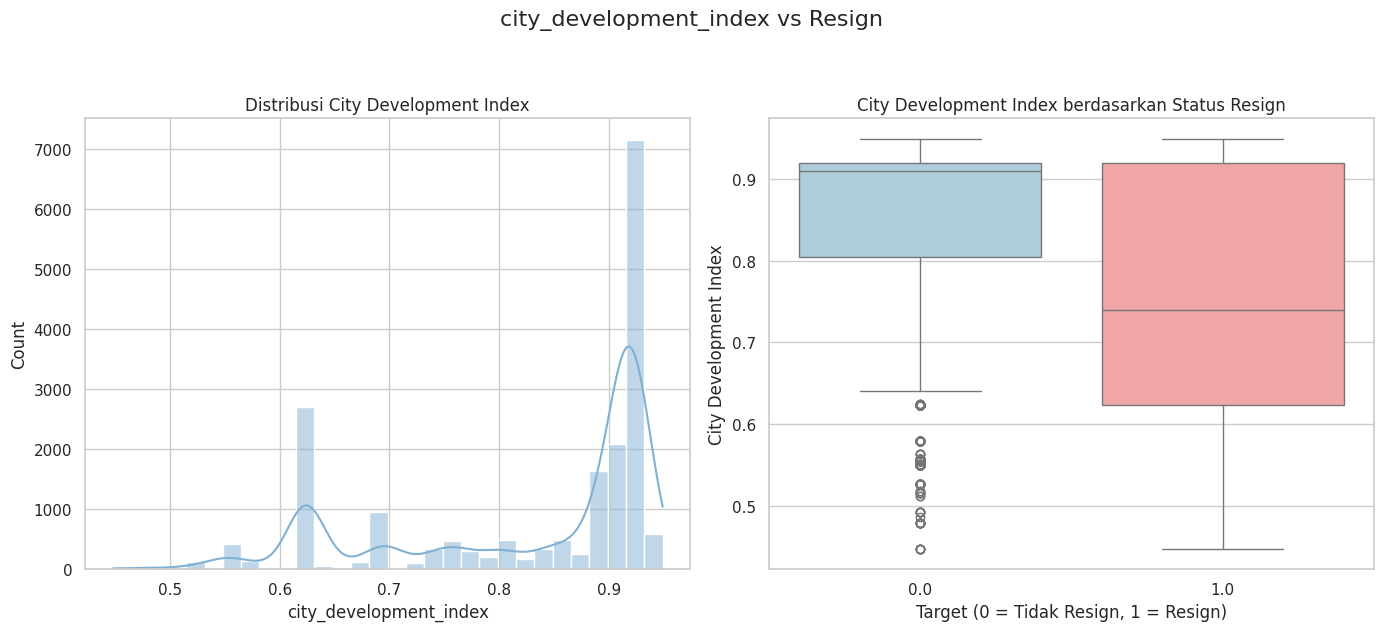

In [ ]:
# TRAINING HOURS vs Target
# Set style visualisasi
sns.set(style="whitegrid")

# Buat visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("city_development_index vs Resign", fontsize=16, y=1.05)

# Histogram distribusi training_hours
sns.histplot(df['city_development_index'], bins=30, kde=True, ax=ax1, color='#80B1D3')
ax1.set_title("Distribusi City Development Index")
ax1.set_xlabel("city_development_index")

# Boxplot training_hours berdasarkan target
sns.boxplot(x='target', y='city_development_index', data=df, ax=ax2, palette=['#A6CEE3', '#FB9A99'])
ax2.set_title("City Development Index berdasarkan Status Resign")
ax2.set_xlabel("Target (0 = Tidak Resign, 1 = Resign)")
ax2.set_ylabel("City Development Index")

plt.tight_layout()
plt.show()

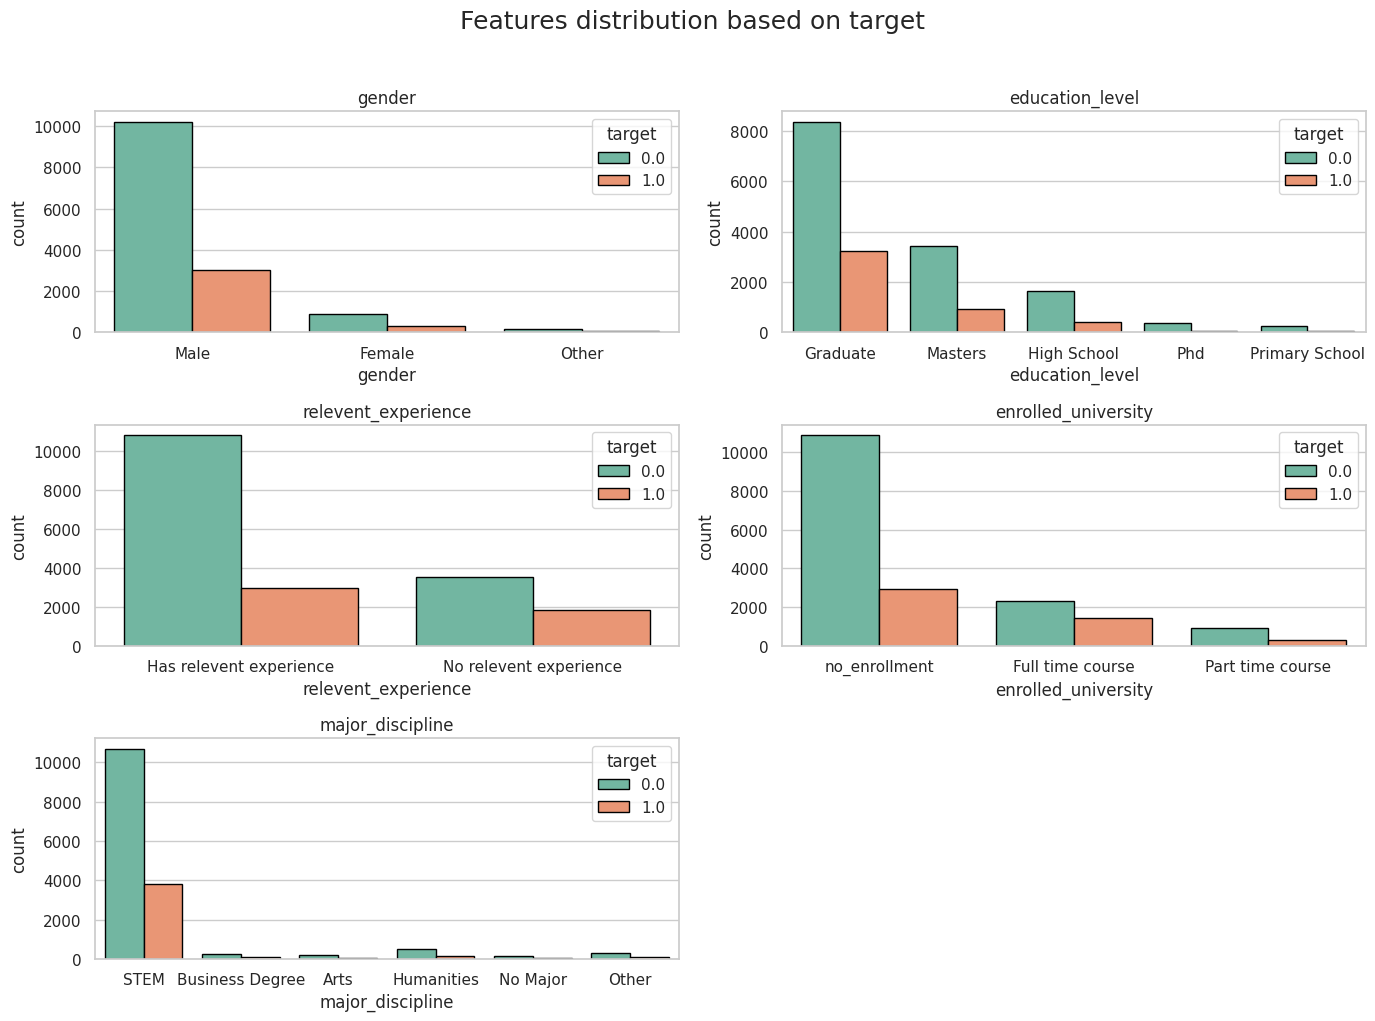

In [ ]:
# Daftar fitur kategorikal yang ingin divisualisasikan
categorical_features = ['gender', 'education_level', 'relevent_experience', 'enrolled_university', 'major_discipline']

# Gaya visualisasi
sns.set(style="whitegrid")
n_features = len(categorical_features)
n_cols = 2
n_rows = (n_features + 1) // n_cols

# Ukuran dan layout subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))
axes = axes.flatten()

# Loop untuk plot tiap fitur
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue='target', palette='Set2', edgecolor='black', ax=axes[i])
    axes[i].set_title(feature, fontsize=12)
    axes[i].tick_params(axis='x', rotation=0)  # label horizontal
    axes[i].legend(title='target', loc='upper right')

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
plt.suptitle("Features distribution based on target", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

Tipe data target: float64
Nilai unik target: [1. 0.]


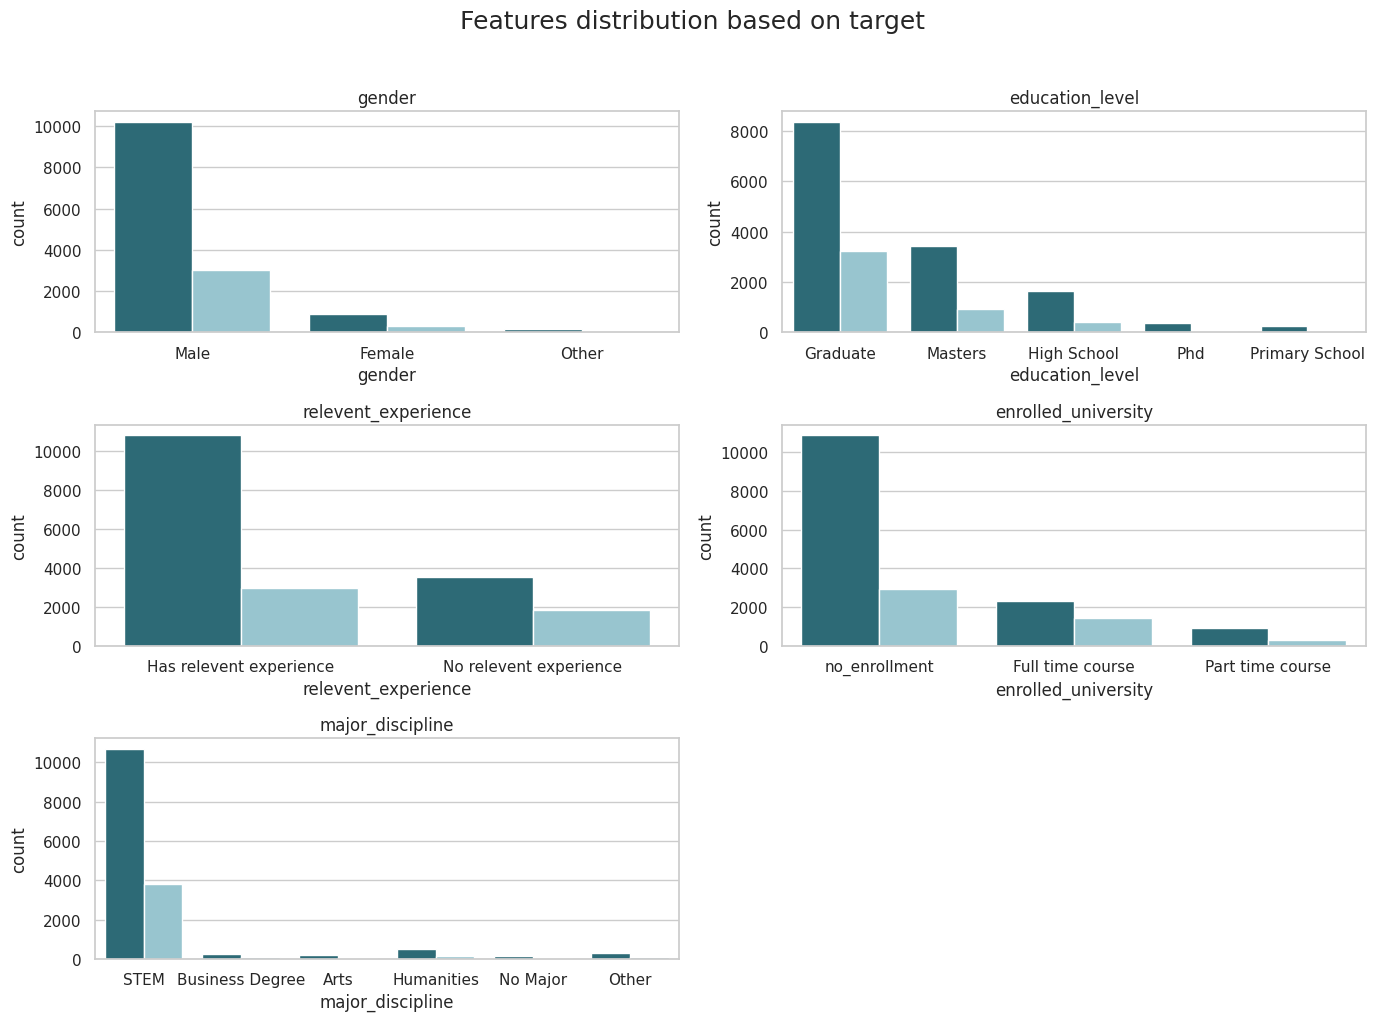

In [ ]:
# Daftar fitur kategorikal yang ingin divisualisasikan
categorical_features = ['gender', 'education_level', 'relevent_experience', 'enrolled_university', 'major_discipline']

# Gaya visualisasi
sns.set(style="whitegrid")
n_features = len(categorical_features)
n_cols = 2
n_rows = (n_features + 1) // n_cols

# Ukuran dan layout subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))
axes = axes.flatten()

# Pastikan target adalah string atau sesuaikan dengan tipe data yang benar
# Warna custom - sesuaikan dengan tipe data target
custom_palette = {0: '#217282', 1: '#8fcbd8'}  # Jika target adalah integer
# atau
# custom_palette = {'0': '#217282', '1': '#8fcbd8'}  # Jika target adalah string
# atau
# custom_palette = {0.0: '#217282', 1.0: '#8fcbd8'}  # Jika target adalah float

# Cek tipe data target untuk memastikan
print("Tipe data target:", df['target'].dtype)
print("Nilai unik target:", df['target'].unique())

# Gunakan yang sesuai dengan tipe data target Anda
# Contoh jika target adalah float:
custom_palette = {0.0: '#217282', 1.0: '#8fcbd8'}

# Loop untuk plot tiap fitur
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue='target', palette=custom_palette, edgecolor=None, ax=axes[i])
    axes[i].set_title(feature, fontsize=12)
    axes[i].tick_params(axis='x', rotation=0)  # label horizontal

    # Menghilangkan legenda sepenuhnya
    if axes[i].legend_ is not None:
        axes[i].legend_.remove()

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
plt.suptitle("Features distribution based on target", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

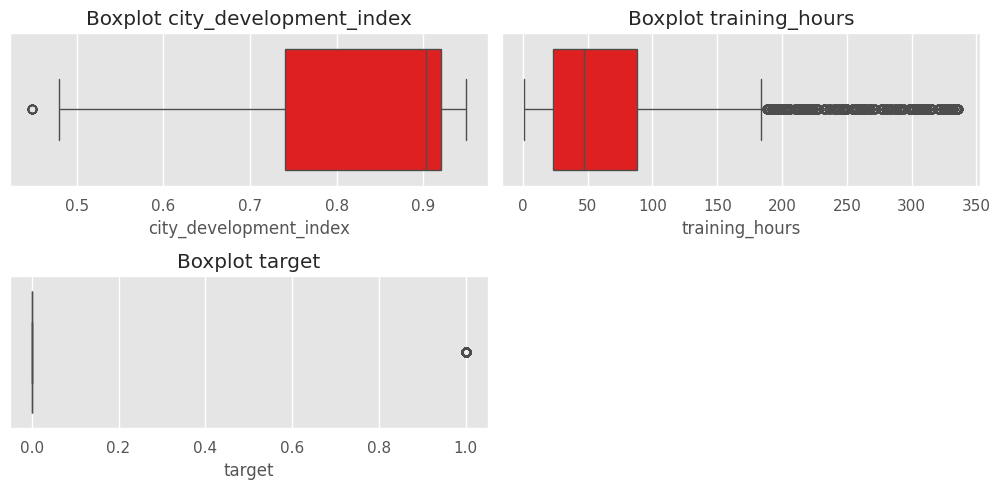

In [ ]:
#Data Numerik Menggunakan Boxplot
plt.style.use('ggplot')
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="red")
    axes[i].set_title(f'Boxplot {col}')

# Remove the empty subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

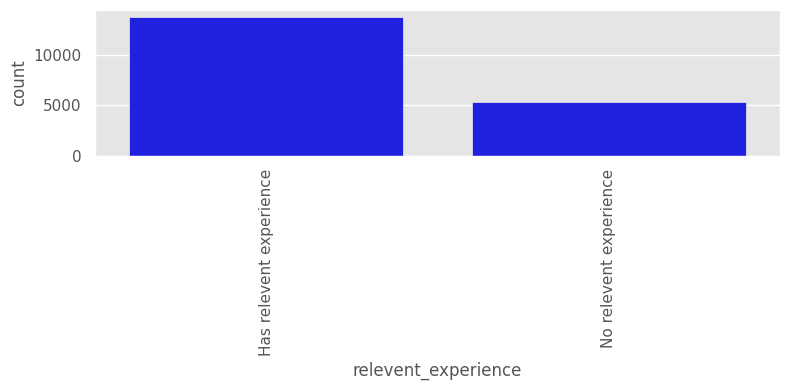

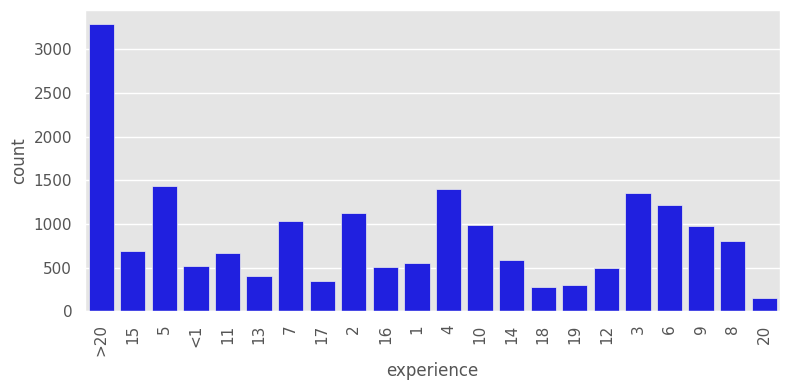

In [ ]:
#Data Kategorik Menggunakan Barchart
cats = ["relevent_experience","experience"]

plt.figure(figsize=(15, 5))

for i in range(len(cats)):
    plt.figure(figsize=(8, 4))
    if df[cats[i]].nunique() > 10:
        top_category = df[cats[i]].value_counts().nlargest(10).index
        sns.countplot(x=df[cats[i]], data=df[df[cats[i]].isin(top_category)], color='blue')
    else:
        sns.countplot(x=df[cats[i]], data=df, color='blue')

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

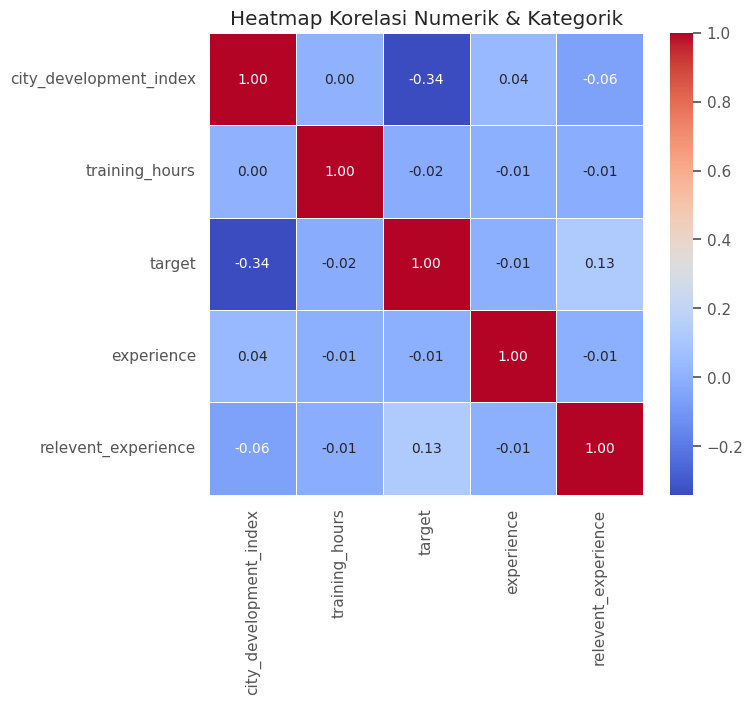

In [ ]:
#Multivariate
# Konversi kategori ke numerik dengan encoding
df_encoded = df.copy()
categorical_columns = ["experience", "relevent_experience"]  # Ganti dengan kolom kategorik di dataset
df_encoded[categorical_columns] = df_encoded[categorical_columns].apply(lambda x: x.astype("category").cat.codes)

# Pilih hanya kolom yang sudah dikonversi
selected_columns = ["city_development_index", "training_hours", "target"] + categorical_columns
df_corr = df_encoded[selected_columns]

# Hitung korelasi
corr_matrix = df_corr.corr()

#Plot Heatmap Korelasi
plt.figure(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Numerik & Kategorik")
plt.show()

<ipython-input-15-5b6b936186f7>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var_x, y=var_y, hue="target", data=data, ci=None, palette="Set2")


<Figure size 800x600 with 0 Axes>

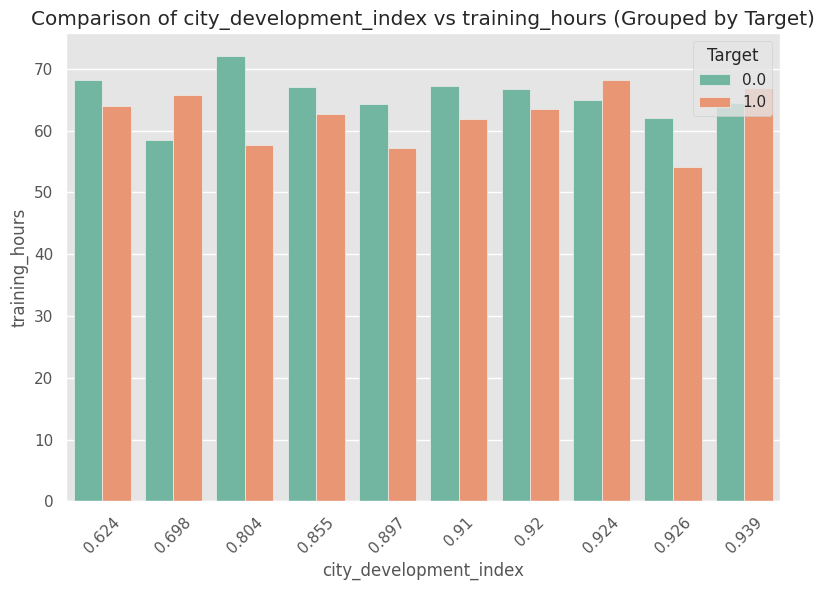

<ipython-input-15-5b6b936186f7>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var_x, y=var_y, hue="target", data=data, ci=None, palette="Set2")


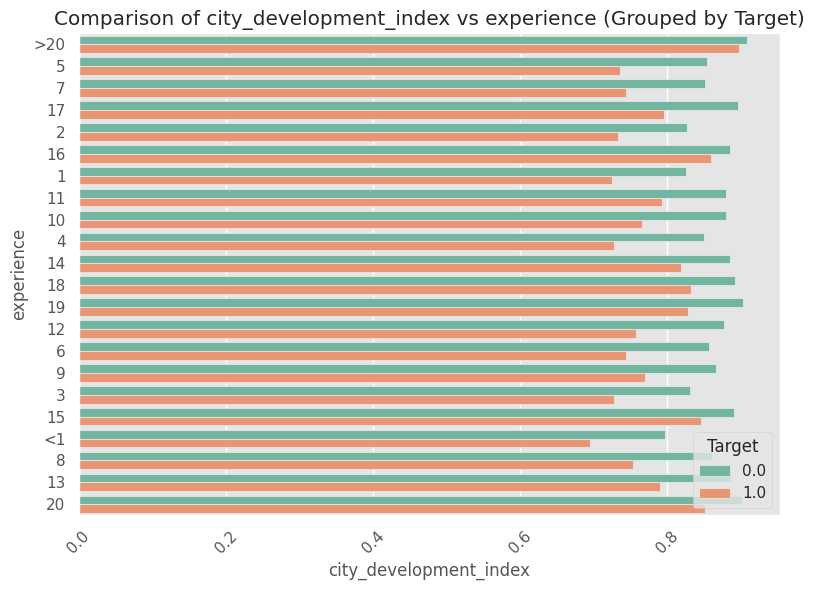

<ipython-input-15-5b6b936186f7>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var_x, y=var_y, hue="target", data=data, ci=None, palette="Set2")


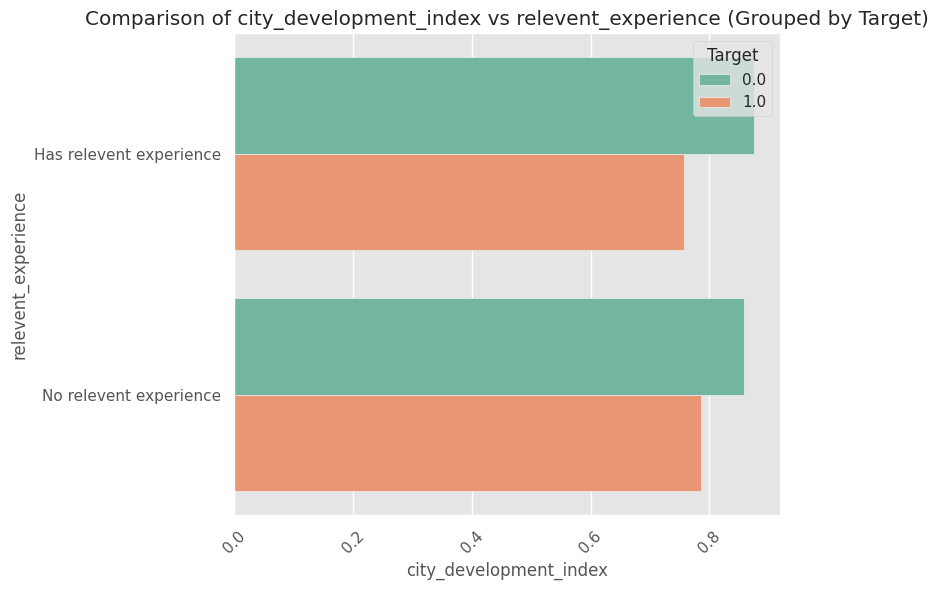

<ipython-input-15-5b6b936186f7>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var_x, y=var_y, hue="target", data=data, ci=None, palette="Set2")


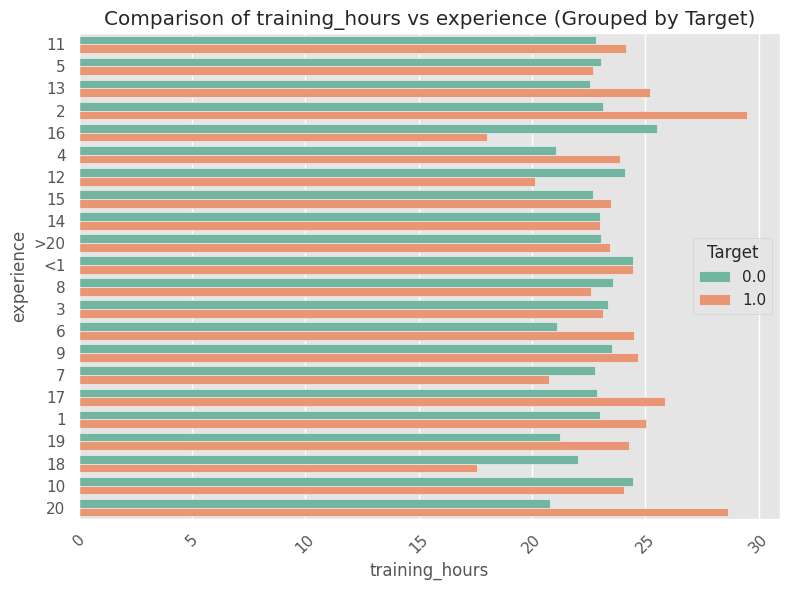

<ipython-input-15-5b6b936186f7>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var_x, y=var_y, hue="target", data=data, ci=None, palette="Set2")


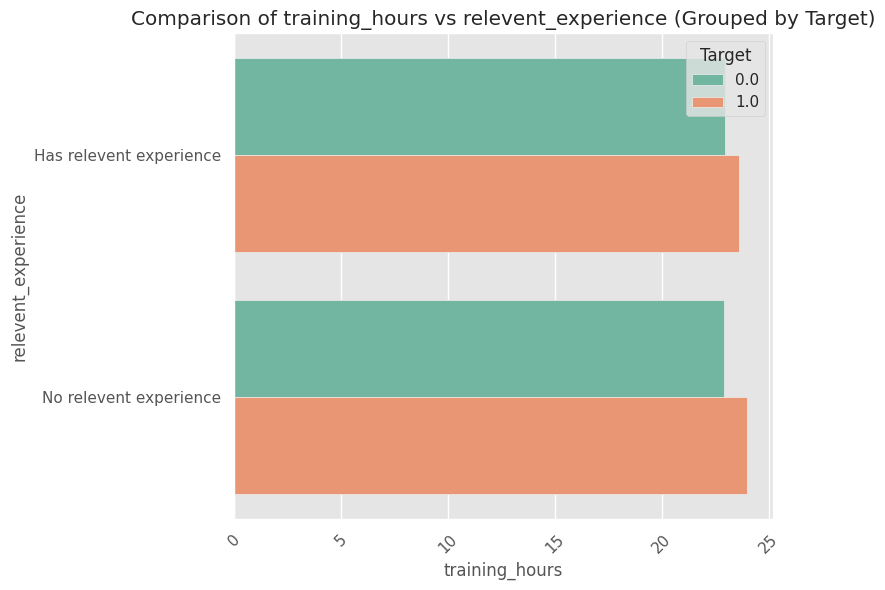

<ipython-input-15-5b6b936186f7>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=var_x, y=var_y, hue="target", data=data, ci=None, palette="Set2")


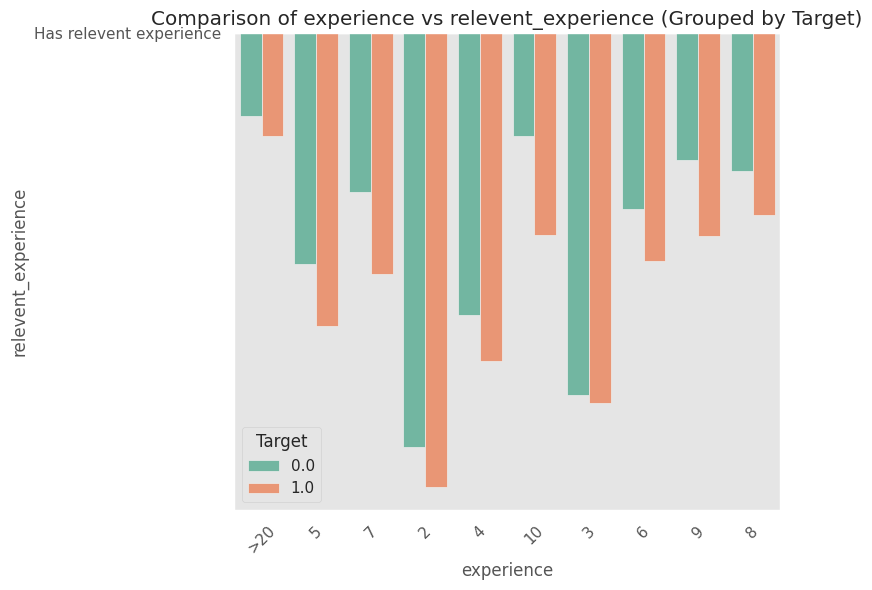

In [ ]:
import itertools

# Konversi kategori ke numerik dengan encoding
df_encoded = df.copy()
categorical_columns = ["experience", "relevent_experience"]  # Ganti dengan kolom kategorik di dataset
df_encoded[categorical_columns] = df_encoded[categorical_columns].apply(lambda x: x.astype("category").cat.codes)

# Pilih hanya kolom yang sudah dikonversi
selected_columns = ["city_development_index", "training_hours"] + categorical_columns

# Buat kombinasi pasangan variabel untuk barplot
combinations = list(itertools.combinations(selected_columns, 2))

#Plot Barplot untuk tiap kombinasi variabel
plt.figure(figsize=(8, 6))

for var_x, var_y in combinations:
    plt.figure(figsize=(8, 6))

    # Ambil hanya 10 kategori terbanyak agar plot tidak penuh
    top_categories = df[var_x].value_counts().nlargest(10).index
    data = df[df[var_x].isin(top_categories)]

    #Barplot dengan Hue = Target
    sns.barplot(x=var_x, y=var_y, hue="target", data=data, ci=None, palette="Set2")

    plt.xticks(rotation=45)
    plt.xlabel(var_x)
    plt.ylabel(var_y)
    plt.title(f"Comparison of {var_x} vs {var_y} (Grouped by Target)")
    plt.legend(title="Target")
    plt.tight_layout()
    plt.show()

In [ ]:
from scipy.stats import chi2_contingency, mannwhitneyu

# Buat salinan data agar aman
df_test = df.copy()

In [ ]:
categorical_cols = ['gender', 'relevent_experience', 'enrolled_university',
                    'education_level', 'major_discipline', 'last_new_job']

print("=== Uji Chi-Square ===\n")
for col in categorical_cols:
    if df_test[col].isnull().any():
        df_temp = df_test[[col, 'target']].dropna()
    else:
        df_temp = df_test[[col, 'target']]

    table = pd.crosstab(df_temp[col], df_temp['target'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"{col}: p-value = {p:.4f} {'(Signifikan)' if p < 0.05 else '(Tidak signifikan)'}")

=== Uji Chi-Square ===

gender: p-value = 0.0109 (Signifikan)
relevent_experience: p-value = 0.0000 (Signifikan)
enrolled_university: p-value = 0.0000 (Signifikan)
education_level: p-value = 0.0000 (Signifikan)
major_discipline: p-value = 0.0321 (Signifikan)
last_new_job: p-value = 0.0000 (Signifikan)


In [ ]:
numerical_cols = ['city_development_index', 'training_hours']

print("\n=== Uji Mann-Whitney U ===\n")
for col in numerical_cols:
    group_0 = df_test[df_test['target'] == 0][col].dropna()
    group_1 = df_test[df_test['target'] == 1][col].dropna()
    stat, p = mannwhitneyu(group_0, group_1, alternative='two-sided')
    print(f"{col}: p-value = {p:.4f} {'(Signifikan)' if p < 0.05 else '(Tidak signifikan)'}")


=== Uji Mann-Whitney U ===

city_development_index: p-value = 0.0000 (Signifikan)
training_hours: p-value = 0.0506 (Tidak signifikan)


##### Handle Missing Value

In [ ]:
#Isi missing values
for col in df.columns:
    if df[col].dtype == "object":  # Jika kategorikal
        df[col] = df[col].fillna(df[col].mode()[0])  # Isi dengan modus
    else:  # Jika numerik
        df[col] = df[col].fillna(df[col].median())  # Isi dengan median

#Cek jumlah missing values setelah cleaning
print("Missing values setelah cleaning:\n", df.isnull().sum())

Missing values setelah cleaning:
 city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
last_new_job              0
training_hours            0
target                    0
dtype: int64


##### Handle Outlier

In [ ]:
# Pilih kolom tertentu yang akan dianalisis outliernya
num_cols = ["city_development_index"]

# Menghitung IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Membuat mask boolean untuk outlier
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)

# Hapus outlier dari DataFrame
df_cleaned = df[~outliers]

# Cek jumlah data setelah menghapus outlier
print(f"Jumlah data setelah menghapus outlier: {df_cleaned.shape[0]}")

Jumlah data setelah menghapus outlier: 19141


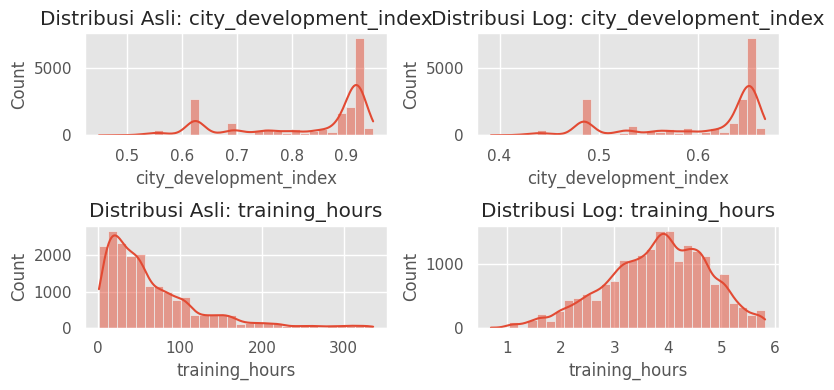

In [ ]:
numerical_cols = ['city_development_index', 'training_hours']

df_log_transformed = df_cleaned.copy()
df_log_transformed[numerical_cols] = np.log1p(df_log_transformed[numerical_cols])  # log(1 + x) untuk menghindari log(0)
df_log_transformed.head()

# Plot distribusi sebelum dan sesudah transformasi
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(8, len(numerical_cols) * 2))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribusi Asli: {col}")

    sns.histplot(df_log_transformed[col], bins=30, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Distribusi Log: {col}")

plt.tight_layout()
plt.show()

In [ ]:
df_log_transformed

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,city_103,0.652325,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1,3.610918,1.0
1,city_40,0.574364,Male,No relevent experience,no_enrollment,Graduate,STEM,15,>4,3.871201,0.0
2,city_21,0.484892,Male,No relevent experience,Full time course,Graduate,STEM,5,0,4.430817,0.0
3,city_115,0.581657,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,0,3.970292,1.0
4,city_162,0.569283,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,4,2.197225,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.630207,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,1,3.761200,1.0
19154,city_103,0.652325,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,4,3.970292,1.0
19155,city_103,0.652325,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,4,3.806662,0.0
19156,city_65,0.588897,Male,Has relevent experience,no_enrollment,High School,STEM,<1,2,4.584967,0.0


In [ ]:
df_feature_extraction = df_cleaned.copy()  # Buat salinan agar perubahan tidak memengaruhi df asli

In [ ]:
# Mapping gaji realistis berdasarkan pendidikan
salary_mapping_realistic = {
    'Primary School': 3000000,
    'High School': 5000000,
    'Graduate': 8000000,
    'Masters': 12000000,
    'Phd': 16000000
}

# Fungsi estimasi gaji
def estimate_salary(row):
    base_salary = salary_mapping_realistic.get(row['education_level'], 0)
    experience = row['experience']

    if isinstance(experience, str):
        if experience == '<1':
            experience = 0.5
        elif experience == '>20':
            experience = 25
        else:
            try:
                experience = float(experience)
            except:
                return None

    if pd.isna(experience) or base_salary == 0:
        return None
    elif experience <= 1:
        return base_salary
    elif 2 <= experience <= 5:
        return base_salary * 1.10
    elif 6 <= experience <= 10:
        return base_salary * 1.20
    else:
        return base_salary * 1.30

# Terapkan ke dataset
df_feature_extraction["estimated_salary"] = df_feature_extraction.apply(estimate_salary, axis=1)

#Data setelah feature extraction
df_feature_extraction

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target,estimated_salary
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1,36,1.0,10400000.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,>4,47,0.0,10400000.0
2,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,0,83,0.0,8800000.0
3,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,0,52,1.0,8000000.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,4,8,0.0,15600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,1,42,1.0,10400000.0
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,4,52,1.0,10400000.0
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,4,44,0.0,10400000.0
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,<1,2,97,0.0,5000000.0


In [ ]:
df_feature_extraction.to_csv("df_feature_extraction.csv", index=False)

In [ ]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.5 MB/s eta 0:00:00


#### Split & Imbalanced Data

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Simpan kolom 'training_hours' ke variabel terpisah
training_hours = df_feature_extraction['training_hours']

# Baru setelah itu hapus dari dataframe utama
df_feature_extraction.drop(columns=['training_hours'], inplace=True)

# Pisahkan fitur dan target
X = df_feature_extraction.drop(columns='target')
y = df_feature_extraction['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Label Encoding
cat_cols = X_train.select_dtypes(include='object').columns
le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    le_dict[col] = le

    # Tangani unseen labels di X_test
    X_test[col] = X_test[col].astype(str)
    X_test[col] = X_test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

#Smote
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, accuracy_score, roc_auc_score, classification_report, precision_score, f1_score
import warnings
warnings.filterwarnings("ignore")

# Model training - Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Prediksi dan Probabilitas
y_pred_train = model.predict(X_train_resampled)
y_proba_train = model.predict_proba(X_train_resampled)[:, 1]

y_pred_test = model.predict(X_test)
y_proba_test = model.predict_proba(X_test)[:, 1]

# Evaluasi Training
print(" Training Evaluation Metrics")
print("-" * 40)
print("Recall   :", round(recall_score(y_train_resampled, y_pred_train), 4))
print("Accuracy :", round(accuracy_score(y_train_resampled, y_pred_train), 4))
print("ROC-AUC  :", round(roc_auc_score(y_train_resampled, y_proba_train), 4))
print()
print("Classification Report (Training):")
print(classification_report(y_train_resampled, y_pred_train))

# Evaluasi Test
print("\n Test Evaluation Metrics")
print("-" * 40)
print("Recall   :", round(recall_score(y_test, y_pred_test), 4))
print("Accuracy :", round(accuracy_score(y_test, y_pred_test), 4))
print("ROC-AUC  :", round(roc_auc_score(y_test, y_proba_test), 4))
print()
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))

 Training Evaluation Metrics
----------------------------------------
Recall   : 0.8814
Accuracy : 0.8924
ROC-AUC  : 0.9685

Classification Report (Training):
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     11499
         1.0       0.90      0.88      0.89     11499

    accuracy                           0.89     22998
   macro avg       0.89      0.89      0.89     22998
weighted avg       0.89      0.89      0.89     22998


 Test Evaluation Metrics
----------------------------------------
Recall   : 0.4984
Accuracy : 0.6863
ROC-AUC  : 0.6232

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78      2876
         1.0       0.40      0.50      0.44       953

    accuracy                           0.69      3829
   macro avg       0.61      0.62      0.61      3829
weighted avg       0.71      0.69      0.70      3829



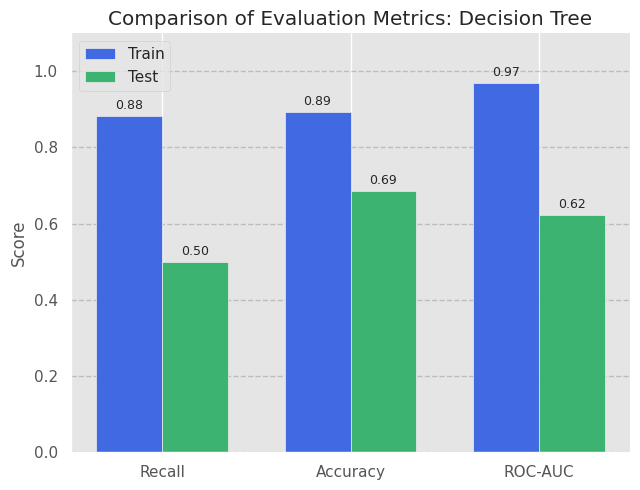

In [ ]:
# Nilai metrik Decision Tree dari screenshot
metrics = ['Recall', 'Accuracy', 'ROC-AUC']
train_scores = [0.8814, 0.8924, 0.9685]
test_scores = [0.4984, 0.6863, 0.6232]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(6.5, 5))

# Bar chart
rects1 = ax.bar(x - width/2, train_scores, width, label='Train', color='royalblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test', color='mediumseagreen')

# Label angka
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

# Styling
ax.set_ylabel('Score')
ax.set_title('Comparison of Evaluation Metrics: Decision Tree')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

# Grid garis bantu horizontal
ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.4)

# Bersihkan border atas & kanan
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

#### XGBoost

In [ ]:
! pip install xgboost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 3.2 MB/s eta 0:00:00


In [ ]:
xgb = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

# Prediksi dan Probabilitas
y_pred_train = xgb.predict(X_train_resampled)
y_proba_train = xgb.predict_proba(X_train_resampled)[:, 1]

y_pred_test = xgb.predict(X_test)
y_proba_test = xgb.predict_proba(X_test)[:, 1]

# Evaluasi Training
print(" Training Evaluation Metrics")
print("-" * 40)
print("Recall   :", round(recall_score(y_train_resampled, y_pred_train), 4))
print("Accuracy :", round(accuracy_score(y_train_resampled, y_pred_train), 4))
print("ROC-AUC  :", round(roc_auc_score(y_train_resampled, y_proba_train), 4))
print()
print("Classification Report (Training):")
print(classification_report(y_train_resampled, y_pred_train))

# Evaluasi Test
print("\n Test Evaluation Metrics")
print("-" * 40)
print("Recall   :", round(recall_score(y_test, y_pred_test), 4))
print("Accuracy :", round(accuracy_score(y_test, y_pred_test), 4))
print("ROC-AUC  :", round(roc_auc_score(y_test, y_proba_test), 4))
print()
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))

 Training Evaluation Metrics
----------------------------------------
Recall   : 0.7543
Accuracy : 0.7887
ROC-AUC  : 0.8692

Classification Report (Training):
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.80     11499
         1.0       0.81      0.75      0.78     11499

    accuracy                           0.79     22998
   macro avg       0.79      0.79      0.79     22998
weighted avg       0.79      0.79      0.79     22998


 Test Evaluation Metrics
----------------------------------------
Recall   : 0.5666
Accuracy : 0.7349
ROC-AUC  : 0.7398

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82      2876
         1.0       0.47      0.57      0.52       953

    accuracy                           0.73      3829
   macro avg       0.66      0.68      0.67      3829
weighted avg       0.75      0.73      0.74      3829



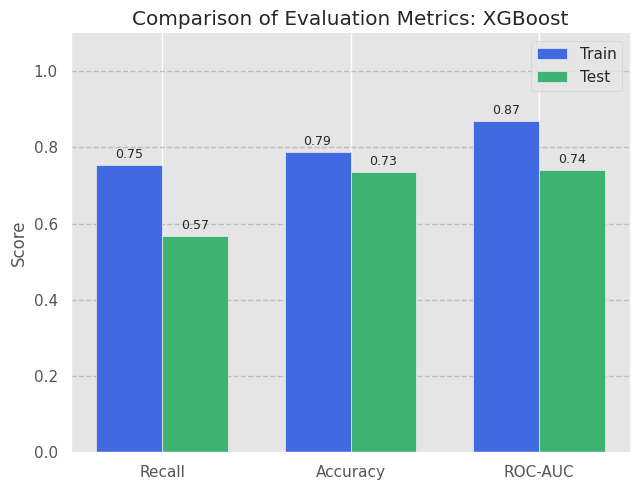

In [ ]:
# Nilai metrik evaluasi XGBoost
metrics = ['Recall', 'Accuracy', 'ROC-AUC']
train_scores = [ 0.7543, 0.7887, 0.8692]
test_scores = [0.5666, 0.7349, 0.7398]

x = np.arange(len(metrics))
width = 0.35

# Setup figure
fig, ax = plt.subplots(figsize=(6.5, 5))

# Bar chart
rects1 = ax.bar(x - width/2, train_scores, width, label='Train', color='royalblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test', color='mediumseagreen')

# Tambahkan label angka di atas bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

# Konfigurasi sumbu, label, dan grid
ax.set_ylabel('Score')
ax.set_title('Comparison of Evaluation Metrics: XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

# Tambahkan garis bantu horizontal seperti grafik sebelumnya
ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.4)

# Bersihkan border (optional)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Rapikan layout
plt.tight_layout()
plt.show()

#### Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# 2. Logistic Regression tanpa hypertuning
logreg_default = LogisticRegression(max_iter=1000, random_state=42)
logreg_default.fit(X_train_scaled, y_train_resampled)

# 3. Evaluasi di training set
y_pred_train = logreg_default.predict(X_train_scaled)
y_proba_train = logreg_default.predict_proba(X_train_scaled)[:, 1]

print("📊 Evaluasi Training Set (Tanpa Hypertuning)")
print("--------------------------------------------")
print(f"Recall     : {recall_score(y_train_resampled, y_pred_train):.4f}")
print(f"Accuracy   : {accuracy_score(y_train_resampled, y_pred_train):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_train_resampled, y_proba_train):.4f}")
print("\nClassification Report (Training):")
print(classification_report(y_train_resampled, y_pred_train))

# 4. Evaluasi di test set
y_pred_test = logreg_default.predict(X_test_scaled)
y_proba_test = logreg_default.predict_proba(X_test_scaled)[:, 1]

print("\n📊 Evaluasi Test Set (Tanpa Hypertuning)")
print("-----------------------------------------")
print(f"Recall     : {recall_score(y_test, y_pred_test):.4f}")
print(f"Accuracy   : {accuracy_score(y_test, y_pred_test):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_test, y_proba_test):.4f}")
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

📊 Evaluasi Training Set (Tanpa Hypertuning)
--------------------------------------------
Recall     : 0.6414
Accuracy   : 0.6852
ROC-AUC    : 0.7388

Classification Report (Training):
              precision    recall  f1-score   support

         0.0       0.67      0.73      0.70     11499
         1.0       0.70      0.64      0.67     11499

    accuracy                           0.69     22998
   macro avg       0.69      0.69      0.68     22998
weighted avg       0.69      0.69      0.68     22998


📊 Evaluasi Test Set (Tanpa Hypertuning)
-----------------------------------------
Recall     : 0.6149
Accuracy   : 0.6931
ROC-AUC    : 0.7141

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.85      0.72      0.78      2876
         1.0       0.42      0.61      0.50       953

    accuracy                           0.69      3829
   macro avg       0.63      0.67      0.64      3829
weighted avg       0.74      0.69      0.71

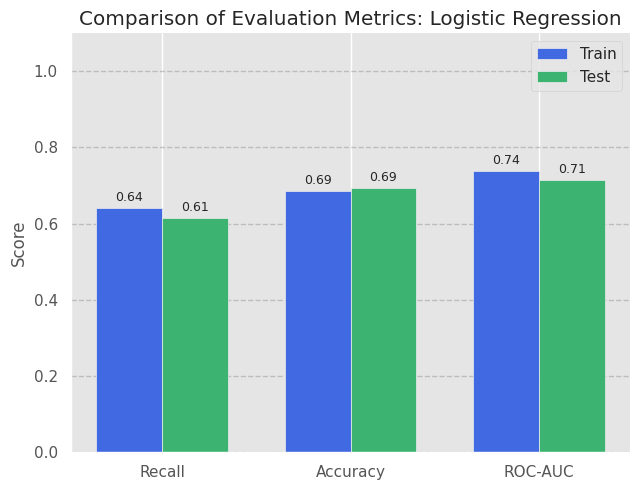

In [ ]:
# Nilai dari evaluasi
metrics = ['Recall', 'Accuracy', 'ROC-AUC']
train_scores = [0.6414, 0.6852, 0.7388]
test_scores = [0.6149, 0.6931, 0.7141]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(6.5, 5))

# Bar chart
rects1 = ax.bar(x - width/2, train_scores, width, label='Train', color='royalblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test', color='mediumseagreen')

# Label angka di atas bar (dua angka di belakang koma)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

# Styling
ax.set_ylabel('Score')
ax.set_title('Comparison of Evaluation Metrics: Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

# Tambahkan grid horizontal
ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.4)

# Hilangkan border atas dan kanan
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

#### Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    # Prediksi label dan probabilitas
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]
    y_pred_train = model.predict(X_train_resampled)
    y_proba_train = model.predict_proba(X_train_resampled)[:, 1]

    # 📊 Evaluasi TRAINING
    print("📊 Evaluasi Training Set")
    print("--------------------------------------------")
    print(f"Recall     : {recall_score(y_train_resampled, y_pred_train):.4f}")
    print(f"Accuracy   : {accuracy_score(y_train_resampled, y_pred_train):.4f}")
    print(f"ROC-AUC    : {roc_auc_score(y_train_resampled, y_proba_train):.4f}")
    print("\nClassification Report (Training):")
    print(classification_report(y_train_resampled, y_pred_train))

    # 📊 Evaluasi TEST
    print("\n📊 Evaluasi Test Set")
    print("--------------------------------------------")
    print(f"Recall     : {recall_score(y_test, y_pred_test):.4f}")
    print(f"Accuracy   : {accuracy_score(y_test, y_pred_test):.4f}")
    print(f"ROC-AUC    : {roc_auc_score(y_test, y_proba_test):.4f}")
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_pred_test))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
eval_classification(rf)

📊 Evaluasi Training Set
--------------------------------------------
Recall     : 0.9020
Accuracy   : 0.8924
ROC-AUC    : 0.9615

Classification Report (Training):
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89     11499
         1.0       0.88      0.90      0.89     11499

    accuracy                           0.89     22998
   macro avg       0.89      0.89      0.89     22998
weighted avg       0.89      0.89      0.89     22998


📊 Evaluasi Test Set
--------------------------------------------
Recall     : 0.5184
Accuracy   : 0.7020
ROC-AUC    : 0.6969

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.79      2876
         1.0       0.42      0.52      0.46       953

    accuracy                           0.70      3829
   macro avg       0.62      0.64      0.63      3829
weighted avg       0.73      0.70      0.71      3829



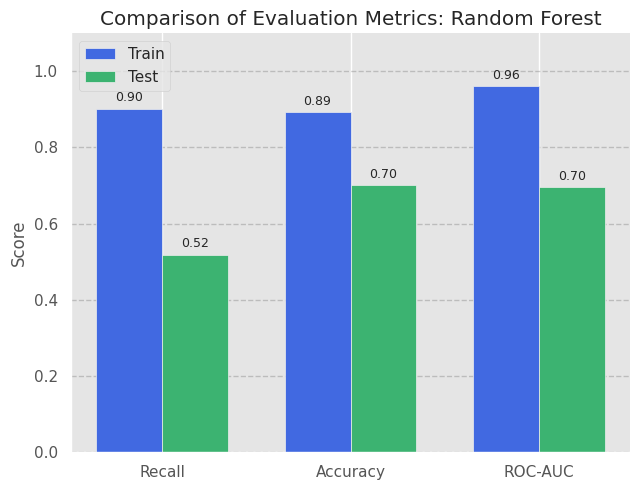

In [ ]:
# Ambil metrik dari gambar evaluasi kamu
metrics = ['Recall', 'Accuracy', 'ROC-AUC']
train_scores = [0.9020, 0.8924, 0.9615]
test_scores = [0.5184, 0.7020, 0.6969]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(6.5, 5))

# Bar chart
rects1 = ax.bar(x - width/2, train_scores, width, label='Train', color='royalblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test', color='mediumseagreen')

# Label angka di atas bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',  # tampilkan hingga 4 digit biar mirip outputmu
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

# Styling sumbu dan grid
ax.set_ylabel('Score')
ax.set_title('Comparison of Evaluation Metrics: Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

# Garis bantu horizontal
ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.4)

# Hilangkan border atas & kanan
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

#### Model Optimum

##### DC Tuning

In [ ]:
# Inisialisasi model Decision Tree
dtree_clf = DecisionTreeClassifier(random_state=42)

# Parameter grid khusus Decision Tree
dtree_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid Search khusus Decision Tree
dt_grid_search = GridSearchCV(
    estimator=dtree_clf,
    param_grid=dtree_param_grid,
    scoring='recall',  # atau 'roc_auc'
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Latih model
dt_grid_search.fit(X_train_resampled, y_train_resampled)

# Tampilkan parameter terbaik
print("Best Parameters (Decision Tree):", dt_grid_search.best_params_)

# Evaluasi langsung pakai dt_grid_search.best_estimator_
y_pred_train = dt_grid_search.best_estimator_.predict(X_train_resampled)
y_proba_train = dt_grid_search.best_estimator_.predict_proba(X_train_resampled)[:, 1]

y_pred_test = dt_grid_search.best_estimator_.predict(X_test)
y_proba_test = dt_grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Training Evaluation
print("\nTraining Evaluation Metrics (Decision Tree)")
print("-" * 45)
print("Recall   :", round(recall_score(y_train_resampled, y_pred_train), 4))
print("Accuracy :", round(accuracy_score(y_train_resampled, y_pred_train), 4))
print("ROC-AUC  :", round(roc_auc_score(y_train_resampled, y_proba_train), 4))
print()
print("Classification Report (Train):")
print(classification_report(y_train_resampled, y_pred_train))

# Test Evaluation
print("\nTest Evaluation Metrics (Decision Tree)")
print("-" * 45)
print("Recall   :", round(recall_score(y_test, y_pred_test), 4))
print("Accuracy :", round(accuracy_score(y_test, y_pred_test), 4))
print("ROC-AUC  :", round(roc_auc_score(y_test, y_proba_test), 4))
print()
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters (Decision Tree): {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Training Evaluation Metrics (Decision Tree)
---------------------------------------------
Recall   : 0.8814
Accuracy : 0.8924
ROC-AUC  : 0.9685

Classification Report (Train):
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89     11499
         1.0       0.90      0.88      0.89     11499

    accuracy                           0.89     22998
   macro avg       0.89      0.89      0.89     22998
weighted avg       0.89      0.89      0.89     22998


Test Evaluation Metrics (Decision Tree)
---------------------------------------------
Recall   : 0.5037
Accuracy : 0.6931
ROC-AUC  : 0.6315

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79      2876
         1.0       0.41      

##### XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, recall_score, accuracy_score, roc_auc_score

# Parameter grid (dengan regularisasi)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 2]
}

# Setup GridSearchCV
xgb_grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit ke data train
xgb_grid.fit(X_train_resampled, y_train_resampled)

# Ambil best model
best_model = xgb_grid.best_estimator_
print("✅ Best XGBoost Params:", xgb_grid.best_params_)

# Prediksi training
y_pred_train = best_model.predict(X_train_resampled)
y_proba_train = best_model.predict_proba(X_train_resampled)[:, 1]

# Prediksi test
y_pred_test = best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)[:, 1]

# Evaluasi training
print("\n📊 Evaluasi Training Set")
print("-" * 40)
print(f"Recall     : {recall_score(y_train_resampled, y_pred_train):.4f}")
print(f"Accuracy   : {accuracy_score(y_train_resampled, y_pred_train):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_train_resampled, y_proba_train):.4f}")
print("\nClassification Report (Training):")
print(classification_report(y_train_resampled, y_pred_train))

# Evaluasi test
print("\n📊 Evaluasi Test Set")
print("-" * 40)
print(f"Recall     : {recall_score(y_test, y_pred_test):.4f}")
print(f"Accuracy   : {accuracy_score(y_test, y_pred_test):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_test, y_proba_test):.4f}")
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

Fitting 3 folds for each of 128 candidates, totalling 384 fits
✅ Best XGBoost Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}

📊 Evaluasi Training Set
----------------------------------------
Recall     : 0.7129
Accuracy   : 0.7590
ROC-AUC    : 0.8384

Classification Report (Training):
              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77     11499
         1.0       0.79      0.71      0.75     11499

    accuracy                           0.76     22998
   macro avg       0.76      0.76      0.76     22998
weighted avg       0.76      0.76      0.76     22998


📊 Evaluasi Test Set
----------------------------------------
Recall     : 0.5950
Accuracy   : 0.7404
ROC-AUC    : 0.7465

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82      2876
         1.0       0.48   

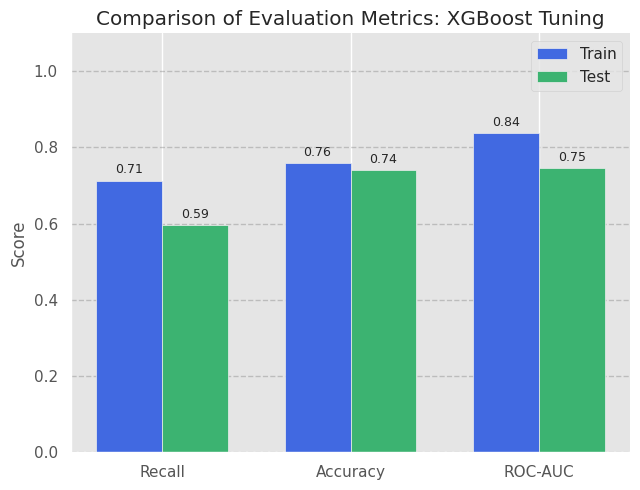

In [ ]:
# Nilai metrik evaluasi XGBoost
metrics = ['Recall', 'Accuracy', 'ROC-AUC']
train_scores = [ 0.7129, 0.7590, 0.8384]
test_scores = [0.5950, 0.7404, 0.7465]

x = np.arange(len(metrics))
width = 0.35

# Setup figure
fig, ax = plt.subplots(figsize=(6.5, 5))

# Bar chart
rects1 = ax.bar(x - width/2, train_scores, width, label='Train', color='royalblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test', color='mediumseagreen')

# Tambahkan label angka di atas bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

# Konfigurasi sumbu, label, dan grid
ax.set_ylabel('Score')
ax.set_title('Comparison of Evaluation Metrics: XGBoost Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

# Tambahkan garis bantu horizontal seperti grafik sebelumnya
ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.4)

# Bersihkan border (optional)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Rapikan layout
plt.tight_layout()
plt.show()

##### Logistic Regression Tuning

In [ ]:
# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression dengan class_weight='balanced'
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train_resampled)
best_model = grid_search.best_estimator_

# Evaluasi di training set
y_pred_train = best_model.predict(X_train_scaled)
y_proba_train = best_model.predict_proba(X_train_scaled)[:, 1]

print("📊 Evaluasi Training Set")
print("--------------------------")
print(f"Recall     : {recall_score(y_train_resampled, y_pred_train):.4f}")
print(f"Accuracy   : {accuracy_score(y_train_resampled, y_pred_train):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_train_resampled, y_proba_train):.4f}")
print("\nClassification Report:")
print(classification_report(y_train_resampled, y_pred_train))

# Evaluasi di test set
y_pred_test = best_model.predict(X_test_scaled)
y_proba_test = best_model.predict_proba(X_test_scaled)[:, 1]

print("\n📊 Evaluasi Test Set")
print("------------------------")
print(f"Recall     : {recall_score(y_test, y_pred_test):.4f}")
print(f"Accuracy   : {accuracy_score(y_test, y_pred_test):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_test, y_proba_test):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

📊 Evaluasi Training Set
--------------------------
Recall     : 0.6430
Accuracy   : 0.6865
ROC-AUC    : 0.7387

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.73      0.70     11499
         1.0       0.70      0.64      0.67     11499

    accuracy                           0.69     22998
   macro avg       0.69      0.69      0.69     22998
weighted avg       0.69      0.69      0.69     22998


📊 Evaluasi Test Set
------------------------
Recall     : 0.6128
Accuracy   : 0.6926
ROC-AUC    : 0.7140

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.72      0.78      2876
         1.0       0.42      0.61      0.50       953

    accuracy                           0.69      3829
   macro avg       0.63      0.67      0.64      3829
weighted avg       0.74      0.69      0.71      3829



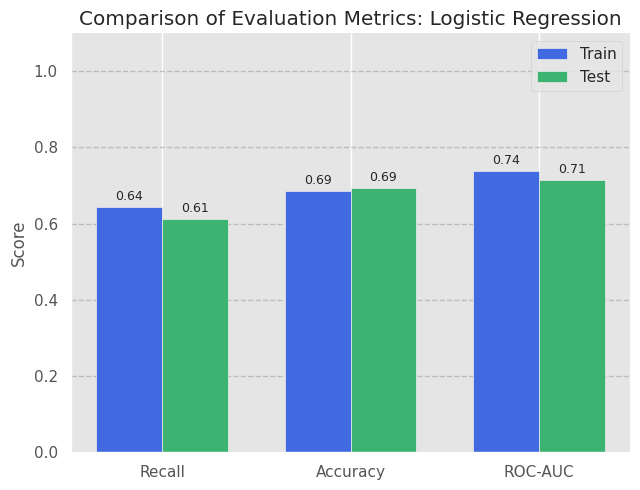

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Nilai dari evaluasi
metrics = ['Recall', 'Accuracy', 'ROC-AUC']
train_scores = [0.6430, 0.6862, 0.7387]
test_scores = [0.6128, 0.6926, 0.7140]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(6.5, 5))

# Bar chart
rects1 = ax.bar(x - width/2, train_scores, width, label='Train', color='royalblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test', color='mediumseagreen')

# Label angka di atas bar (dua angka di belakang koma)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)

# Styling
ax.set_ylabel('Score')
ax.set_title('Comparison of Evaluation Metrics: Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.1)
ax.legend()

# Tambahkan grid horizontal
ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.4)

# Hilangkan border atas dan kanan
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

📊 Evaluasi Training Set (SMOTE + Hypertuning)
------------------------------------------------
Recall     : 0.6430
Accuracy   : 0.6865
ROC-AUC    : 0.7387

Classification Report (Training):
              precision    recall  f1-score   support

         0.0       0.67      0.73      0.70     11499
         1.0       0.70      0.64      0.67     11499

    accuracy                           0.69     22998
   macro avg       0.69      0.69      0.69     22998
weighted avg       0.69      0.69      0.69     22998


📌 Threshold untuk Recall ~0.70
----------------------------------
Threshold : 0.43
Recall    : 0.6967
Precision : 0.3771
Accuracy  : 0.6380


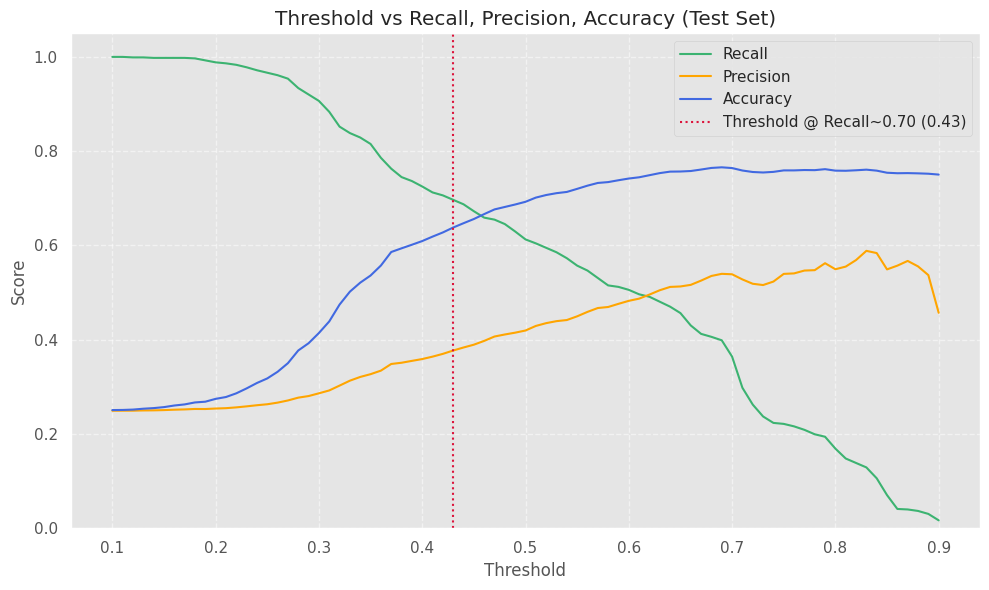

,Threshold,Recall,Accuracy,Precision
0,0.10,1.000000,0.250718,0.249346
1,0.20,0.988458,0.274484,0.253977
2,0.30,0.906611,0.414207,0.286282
3,0.40,0.725079,0.609297,0.358961
4,0.45,0.672613,0.656046,0.389429
5,0.50,0.612802,0.692609,0.419540
6,0.60,0.505771,0.741969,0.482482
7,0.70,0.364113,0.764168,0.538820
8,0.80,0.168940,0.758684,0.549488
9,0.90,0.016789,0.750326,0.457143


In [ ]:
from imblearn.pipeline import Pipeline

# 1. Pipeline: Scaling + SMOTE + Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# 2. Hyperparameter grid
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__solver': ['liblinear', 'lbfgs']
}

# 3. Training & hypertuning
grid_search_logreg = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search_logreg.fit(X_train_resampled, y_train_resampled)

# 4. Evaluasi Training Set
y_pred_train = grid_search_logreg.predict(X_train_resampled)
y_proba_train = grid_search_logreg.predict_proba(X_train_resampled)[:, 1]

print("📊 Evaluasi Training Set (SMOTE + Hypertuning)")
print("------------------------------------------------")
print(f"Recall     : {recall_score(y_train_resampled, y_pred_train):.4f}")
print(f"Accuracy   : {accuracy_score(y_train_resampled, y_pred_train):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_train_resampled, y_proba_train):.4f}")
print("\nClassification Report (Training):")
print(classification_report(y_train_resampled, y_pred_train))

# 5. Threshold Tuning: Recall vs. Precision vs. Accuracy
y_proba_test = grid_search_logreg.predict_proba(X_test)[:, 1]
thresholds = np.arange(0.1, 0.91, 0.01)
recalls, precisions, accuracies = [], [], []

for t in thresholds:
    y_pred_thresh = (y_proba_test >= t).astype(int)
    recalls.append(recall_score(y_test, y_pred_thresh))
    precisions.append(precision_score(y_test, y_pred_thresh))
    accuracies.append(accuracy_score(y_test, y_pred_thresh))

# 6. Cari threshold terdekat dengan recall = 0.70
target_recall = 0.70
closest_idx = np.argmin(np.abs(np.array(recalls) - target_recall))
threshold_at_70_recall = thresholds[closest_idx]
precision_at_70 = precisions[closest_idx]
accuracy_at_70 = accuracies[closest_idx]

# Print hasil
print("\n📌 Threshold untuk Recall ~0.70")
print("----------------------------------")
print(f"Threshold : {threshold_at_70_recall:.2f}")
print(f"Recall    : {recalls[closest_idx]:.4f}")
print(f"Precision : {precision_at_70:.4f}")
print(f"Accuracy  : {accuracy_at_70:.4f}")

# 7. Visualisasi
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label="Recall", color="mediumseagreen")
plt.plot(thresholds, precisions, label="Precision", color="orange")
plt.plot(thresholds, accuracies, label="Accuracy", color="royalblue")

plt.axvline(threshold_at_70_recall, color='crimson', linestyle=':', label=f'Threshold @ Recall~0.70 ({threshold_at_70_recall:.2f})')

plt.title("Threshold vs Recall, Precision, Accuracy (Test Set)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# 8. Tabel metrik untuk threshold kelipatan 0.1 dan threshold optimal (0.45)
kelipatan_thresholds = np.round(np.arange(0.1, 1.0, 0.1), 2)
metrics_data = []

for t in kelipatan_thresholds:
    y_pred_t = (y_proba_test >= t).astype(int)
    metrics_data.append([
        t,
        recall_score(y_test, y_pred_t),
        accuracy_score(y_test, y_pred_t),
        precision_score(y_test, y_pred_t)
    ])

# Tambahkan threshold optimal (misal 0.45)
threshold_opt = 0.45
y_pred_opt = (y_proba_test >= threshold_opt).astype(int)
metrics_data.append([
    threshold_opt,
    recall_score(y_test, y_pred_opt),
    accuracy_score(y_test, y_pred_opt),
    precision_score(y_test, y_pred_opt)
])

# Buat DataFrame dan urutkan
df_threshold_metrics = pd.DataFrame(metrics_data, columns=["Threshold", "Recall", "Accuracy", "Precision"])
df_threshold_metrics = df_threshold_metrics.sort_values("Threshold").reset_index(drop=True)

# Tampilkan tabel
display(df_threshold_metrics)

##### Random Forest

In [ ]:
import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_base = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_base,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=1,
                           scoring='f1_macro')

# Fit ke data training
grid_search.fit(X_train_resampled, y_train_resampled.values.ravel())

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_macro', verbose=1)

In [ ]:
best_rf = grid_search.best_estimator_
eval_classification(best_rf)

📊 Evaluasi Training Set
--------------------------------------------
Recall     : 0.8672
Accuracy   : 0.8761
ROC-AUC    : 0.9438

Classification Report (Training):
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88     11499
         1.0       0.88      0.87      0.87     11499

    accuracy                           0.88     22998
   macro avg       0.88      0.88      0.88     22998
weighted avg       0.88      0.88      0.88     22998


📊 Evaluasi Test Set
--------------------------------------------
Recall     : 0.5341
Accuracy   : 0.7242
ROC-AUC    : 0.7207

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.84      0.79      0.81      2876
         1.0       0.45      0.53      0.49       953

    accuracy                           0.72      3829
   macro avg       0.65      0.66      0.65      3829
weighted avg       0.74      0.72      0.73      3829



In [ ]:
# Menghitung threshold otomatis berdasarkan quantile
th_segmen = training_hours.copy()

q1 = th_segmen.quantile(0.25)
q2 = th_segmen.quantile(0.50)
q3 = th_segmen.quantile(0.75)

def training_class(hours):
    if hours <= q1:
        return 'Low'
    elif hours <= q2:
        return 'Medium'
    else:
        return 'High'

training_hours_group = th_segmen.apply(training_class)
print('Kuartil 1',q1)
print('Kuartil 2',q2)
print('Kuartil 3',q3)
training_hours_group

Kuartil 1 23.0
Kuartil 2 47.0
Kuartil 3 88.0


,training_hours
0,Medium
1,Medium
2,High
3,High
4,Low
...,...
19153,Medium
19154,High
19155,Medium
19156,High


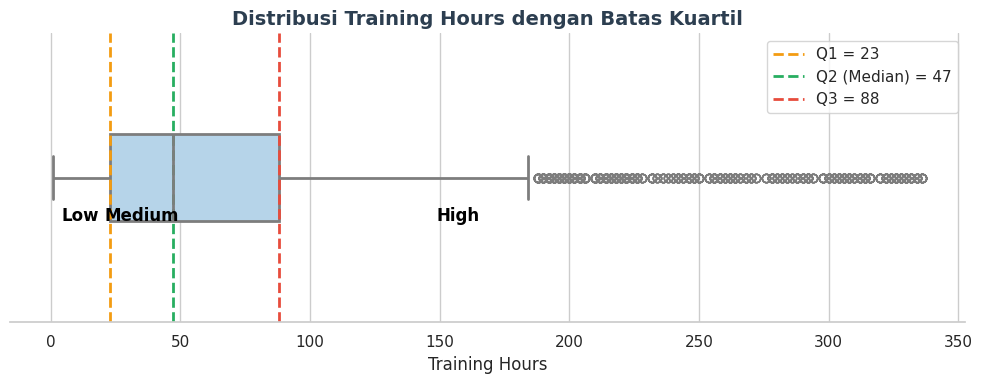

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set gaya visual
sns.set(style='whitegrid')

plt.figure(figsize=(10, 4))

# Boxplot dengan warna modern
sns.boxplot(x=training_hours, color='#AED6F1', linewidth=2, width=0.3, fliersize=6)

# Tambahkan garis kuartil (dengan warna khas)
plt.axvline(q1, color='#F39C12', linestyle='--', linewidth=2, label=f'Q1 = {q1:.0f}')
plt.axvline(q2, color='#27AE60', linestyle='--', linewidth=2, label=f'Q2 (Median) = {q2:.0f}')
plt.axvline(q3, color='#E74C3C', linestyle='--', linewidth=2, label=f'Q3 = {q3:.0f}')

# Tambahkan label segmentasi di atas boxplot
plt.text(q1 / 2, 0.15, 'Low', ha='center', fontsize=12, weight='bold', color='black')
plt.text((q1 + q2) / 2, 0.15, 'Medium', ha='center', fontsize=12, weight='bold', color='black')
plt.text((q2 + q3 + training_hours.max()) / 3, 0.15, 'High', ha='center', fontsize=12, weight='bold', color='black')

# Estetik tambahan
plt.title('Distribusi Training Hours dengan Batas Kuartil', fontsize=14, weight='bold', color='#2C3E50')
plt.xlabel('Training Hours', fontsize=12)
plt.yticks([])
plt.legend(loc='upper right', frameon=True)
sns.despine(left=True, bottom=False)
plt.tight_layout()
plt.show()

In [ ]:
model_optimum = grid_search_logreg.best_estimator_
print(model_optimum)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('clf',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=1000, random_state=42))])


In [ ]:
# Ambil scaler dari pipeline
scaler = model_optimum.named_steps['scaler']

# Transform X_train secara manual untuk SHAP (harus di-scale)
X_train_scaled = scaler.transform(X_train)

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.3 MB/s eta 0:00:00


In [ ]:
import shap

# Ambil model Logistic Regression dari pipeline
logreg_model = model_optimum.named_steps['clf']

# Buat SHAP explainer (Linear karena Logistic Regression)
explainer = shap.Explainer(logreg_model, X_train_scaled)

# Hitung SHAP values
shap_values = explainer(X_train_scaled)

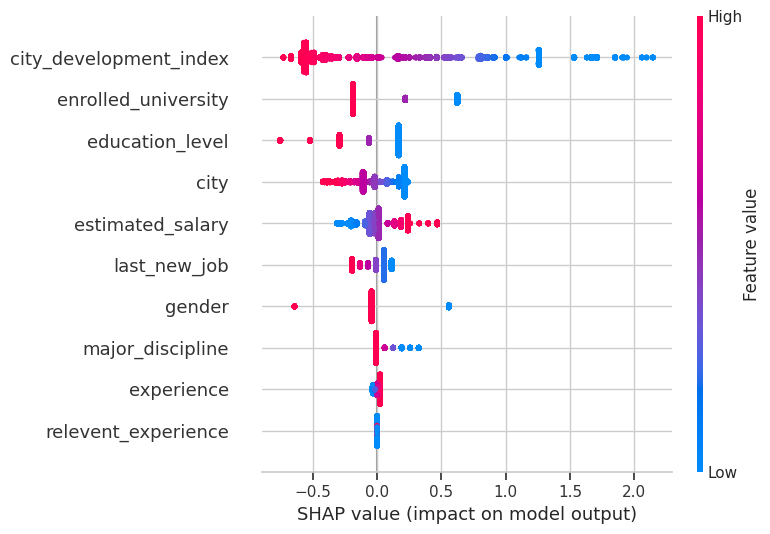

In [ ]:
# Plot summary SHAP
shap.summary_plot(shap_values, X_train_scaled, feature_names=X_train.columns)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
import pandas as pd

# 1. Prediksi label dari model terbaik (model_optimum_logreg)
y_pred_test = model_optimum.predict(X_test)

# 2. Gabungkan hasil prediksi dengan data asli untuk analisis fairness
fair_df = pd.DataFrame({
    'Gender': X_test['gender'],     # ← Ganti jika ingin analisis berdasarkan fitur lain, misal 'age_group'
    'True_Label': y_test,
    'Pred_Label': y_pred_test
})

# 3. Hitung metrik evaluasi per grup
fairness_result = {}

for g in fair_df['Gender'].unique():
    sub = fair_df[fair_df['Gender'] == g]

    fairness_result[g] = {
        'Accuracy': accuracy_score(sub['True_Label'], sub['Pred_Label']),
        'Recall': recall_score(sub['True_Label'], sub['Pred_Label']),
        'Precision': precision_score(sub['True_Label'], sub['Pred_Label'])
    }

# 4. Tampilkan hasil sebagai DataFrame
fairness_df = pd.DataFrame(fairness_result).T
display(fairness_df)

,Accuracy,Recall,Precision
1,0.705516,0.608154,0.435877
0,0.513514,0.750000,0.288462
2,0.714286,0.200000,0.500000


In [ ]:
# 1. Prediksi dari model optimal
y_pred_test = model_optimum.predict(X_test)

# 2. Ganti fitur analisis fairness → misalnya relevent_experience
fair_df = pd.DataFrame({
    'Group': X_test['relevent_experience'],  # ← Ganti kolom di sini
    'True_Label': y_test,
    'Pred_Label': y_pred_test
})

# 3. Hitung metrik evaluasi per grup
fairness_result = {}

for g in fair_df['Group'].unique():
    sub = fair_df[fair_df['Group'] == g]

    fairness_result[g] = {
        'Accuracy': accuracy_score(sub['True_Label'], sub['Pred_Label']),
        'Recall': recall_score(sub['True_Label'], sub['Pred_Label']),
        'Precision': precision_score(sub['True_Label'], sub['Pred_Label'])
    }

# 4. Tampilkan hasil sebagai DataFrame
fairness_df = pd.DataFrame(fairness_result).T
display(fairness_df)

,Accuracy,Recall,Precision
1,0.615314,0.642077,0.446768
0,0.723646,0.594549,0.403002


#### **Fairness Analysis**

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Fungsi Demographic Parity
def demographic_parity(y_pred, protected_attribute):
    result = {}
    for group in np.unique(protected_attribute):
        idx = protected_attribute == group
        result[group] = np.mean(y_pred[idx])
    return result

# Fungsi Equalized Odds
def equalized_odds(y_true, y_pred, protected_attribute):
    result = {}
    for group in np.unique(protected_attribute):
        idx = protected_attribute == group
        y_t = y_true[idx]
        y_p = y_pred[idx]

        cm = confusion_matrix(y_t, y_p)
        tn, fp, fn, tp = cm.ravel() if cm.shape == (2, 2) else (0, 0, 0, 0)

        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
        result[group] = {'FPR': fpr, 'FNR': fnr}
    return result

In [ ]:
##1. Fairness Analysis berdasarkan Relevant Experience ##
y_pred_test = model_optimum.predict(X_test)

# Hitung Demographic Parity untuk relevent_experience
dp_result = demographic_parity(y_pred_test, X_test['relevent_experience'])
print("\nDemographic Parity (Relevent Experience):")
for group, parity in dp_result.items():
    print(f"{group}: {parity:.2f}")

# Hitung Equalized Odds untuk relevent_experience
eo_result = equalized_odds(y_test, y_pred_test, X_test['relevent_experience'])
print("\nEqualized Odds (FPR, FNR) - Relevent Experience:")
for group, odds in eo_result.items():
    print(f"{group}: FPR = {odds['FPR']:.2f}, FNR = {odds['FNR']:.2f}")


Demographic Parity (Relevent Experience):
0: 0.32
1: 0.48

Equalized Odds (FPR, FNR) - Relevent Experience:
0: FPR = 0.24, FNR = 0.41
1: FPR = 0.40, FNR = 0.36


In [ ]:
##2. Fairness Analysis berdasarkan Education Level ##
y_pred_test = model_optimum.predict(X_test)

# Hitung Demographic Parity untuk education_level
dp_result = demographic_parity(y_pred_test , X_test['education_level'])
print("\nDemographic Parity (Education Level):")
for group, parity in dp_result.items():
    print(f"{group}: {parity:.2f}")

# Hitung Equalized Odds untuk education_level
eo_result = equalized_odds(y_test, y_pred_test , X_test['education_level'])
print("\nEqualized Odds (FPR, FNR) - Education Level:")
for group, odds in eo_result.items():
    print(f"{group}: FPR = {odds['FPR']:.2f}, FNR = {odds['FNR']:.2f}")


Demographic Parity (Education Level):
0: 0.43
1: 0.29
2: 0.26
3: 0.15
4: 0.06

Equalized Odds (FPR, FNR) - Education Level:
0: FPR = 0.34, FNR = 0.35
1: FPR = 0.22, FNR = 0.45
2: FPR = 0.19, FNR = 0.48
3: FPR = 0.14, FNR = 0.75
4: FPR = 0.04, FNR = 0.75


In [ ]:
##3. Fairness Analysis berdasarkan Enrolled University ##
y_pred_test = model_optimum.predict(X_test)

# Hitung Demographic Parity untuk enrolled_university
dp_result = demographic_parity(y_pred_test, X_test['enrolled_university'])
print("\nDemographic Parity (Enrolled_university):")
for group, parity in dp_result.items():
    print(f"{group}: {parity:.2f}")

# Hitung Equalized Odds untuk enrolled_university
eo_result = equalized_odds(y_test, y_pred_test, X_test['enrolled_university'])
print("\nEqualized Odds (FPR, FNR) - Enrolled_University:")
for group, odds in eo_result.items():
    print(f"{group}: FPR = {odds['FPR']:.2f}, FNR = {odds['FNR']:.2f}")


Demographic Parity (Enrolled_university):
0: 0.75
1: 0.45
2: 0.25

Equalized Odds (FPR, FNR) - Enrolled_University:
0: FPR = 0.69, FNR = 0.16
1: FPR = 0.40, FNR = 0.38
2: FPR = 0.18, FNR = 0.49


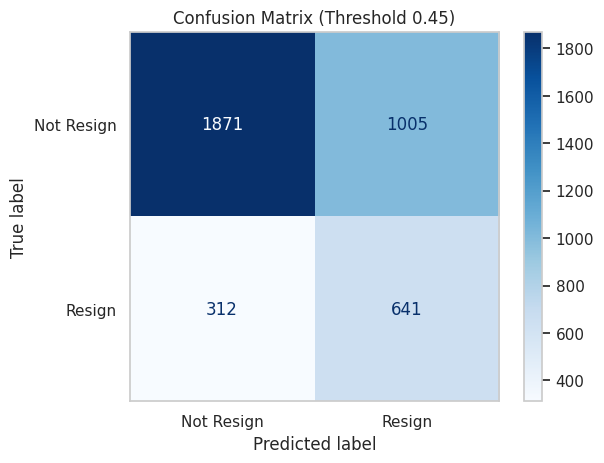

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Prediksi label (pakai threshold 0.45 seperti sebelumnya)
y_proba_test = model_optimum.predict_proba(X_test)[:, 1]
y_pred_optimal = (y_proba_test >= 0.45).astype(int)

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimal)

# 3. Visualisasi
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Resign', 'Resign'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Threshold 0.45)")
plt.grid(False)
plt.show()

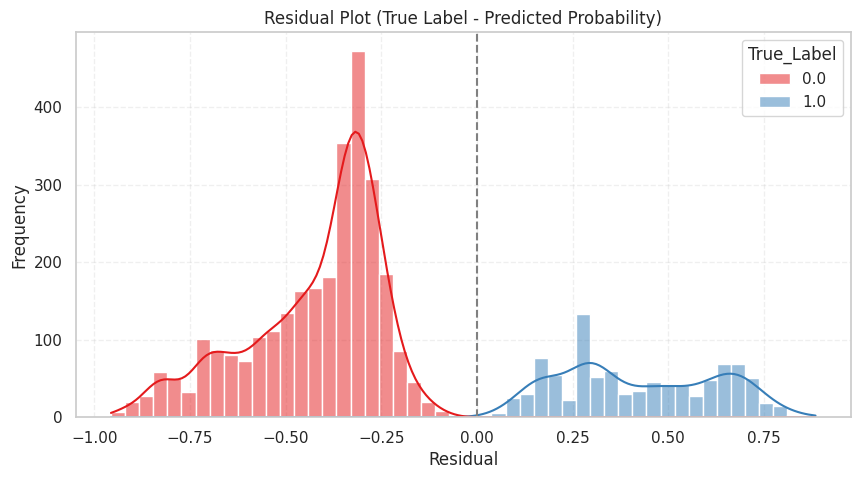

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prediksi probabilitas dan residual
y_proba = model_optimum.predict_proba(X_test)[:, 1]
residuals = y_test - y_proba  # Bisa negatif atau positif

# 2. Buat DataFrame
res_df = pd.DataFrame({
    'Residual': residuals,
    'True_Label': y_test
})

# 3. Plot residual distribusi per kelas
plt.figure(figsize=(10, 5))
sns.histplot(data=res_df, x='Residual', hue='True_Label', bins=50, kde=True, palette='Set1')
plt.title("Residual Plot (True Label - Predicted Probability)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Business Impact Analysis


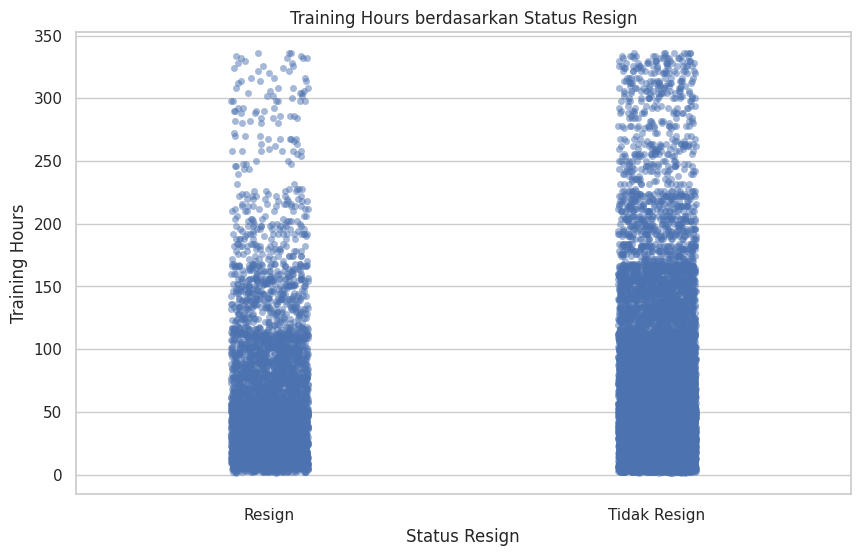

In [ ]:
df['resign_status'] = df['target'].map({0: 'Tidak Resign', 1: 'Resign'})

plt.figure(figsize=(10, 6))
sns.stripplot(x='resign_status', y='training_hours', data=df, jitter=True, alpha=0.5)
plt.title('Training Hours berdasarkan Status Resign')
plt.xlabel('Status Resign')
plt.ylabel('Training Hours')
plt.grid(True, axis='y')
plt.show()


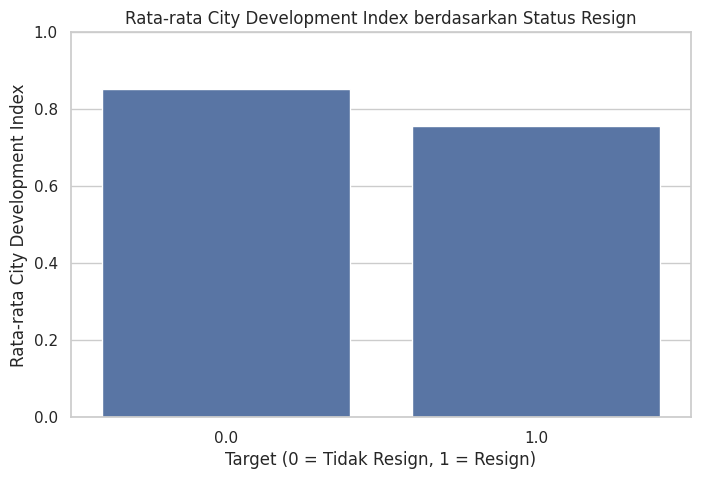

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


avg_cdi = df.groupby('target')['city_development_index'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='target', y='city_development_index', data=avg_cdi)
plt.title('Rata-rata City Development Index berdasarkan Status Resign')
plt.xlabel('Target (0 = Tidak Resign, 1 = Resign)')
plt.ylabel('Rata-rata City Development Index')
plt.ylim(0, 1)  # city_development_index dalam rentang 0-1
plt.grid(True, axis='y')
plt.show()

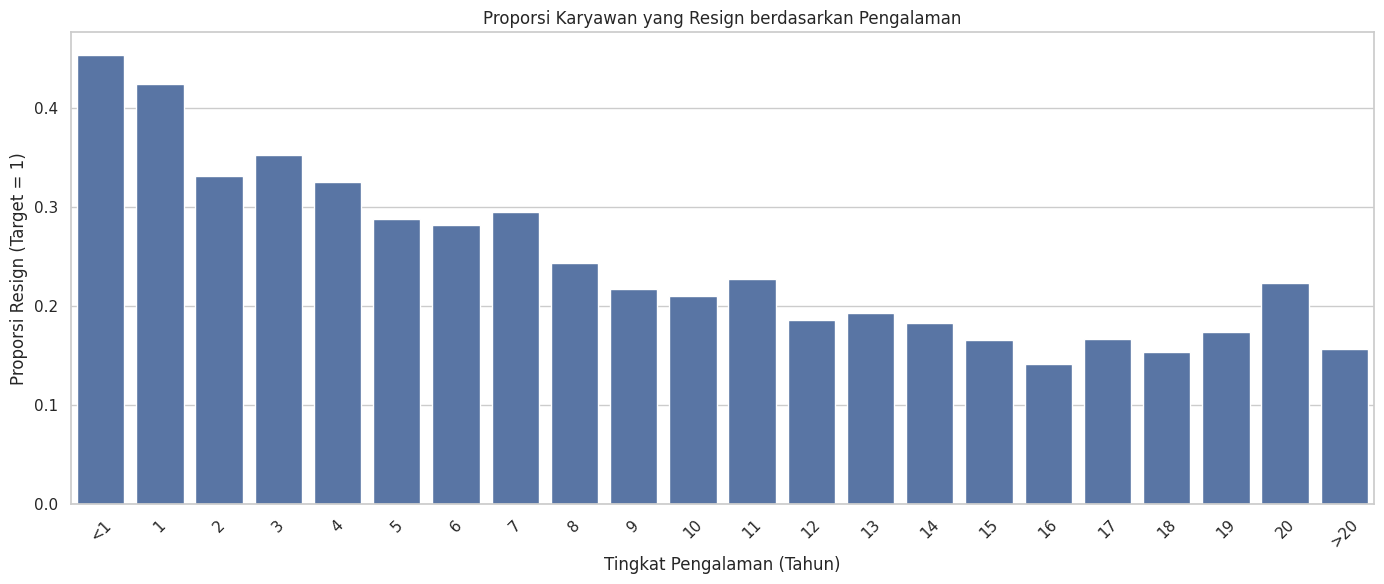

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

experience_target = df.groupby('experience')['target'].mean().reset_index()

# urutan untuk kategori pengalaman
order_mapping = {
    'fresher': -1, '<1': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6,
    '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13,
    '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '>20': 21
}

experience_target['order'] = experience_target['experience'].map(order_mapping)
experience_target = experience_target.sort_values('order')

# Visualisasi barplot
plt.figure(figsize=(14, 6))
sns.barplot(x='experience', y='target', data=experience_target)
plt.title('Proporsi Karyawan yang Resign berdasarkan Pengalaman')
plt.xlabel('Tingkat Pengalaman (Tahun)')
plt.ylabel('Proporsi Resign (Target = 1)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


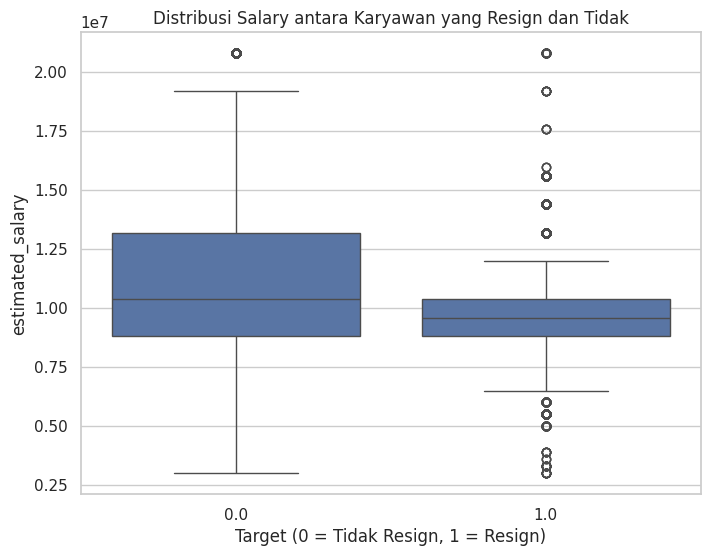

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
salary_mapping_realistic = {
    'Primary School': 3000000,
    'High School': 5000000,
    'Graduate': 8000000,
    'Masters': 12000000,
    'Phd': 16000000
}

# Fungsi estimasi gaji
def estimate_salary(row):
    base_salary = salary_mapping_realistic.get(row['education_level'], 0)
    experience = row['experience']

    if isinstance(experience, str):
        if experience == '<1':
            experience = 0.5
        elif experience == '>20':
            experience = 25
        else:
            try:
                experience = float(experience)
            except:
                return None

    if pd.isna(experience) or base_salary == 0:
        return None
    elif experience <= 1:
        return base_salary
    elif 2 <= experience <= 5:
        return base_salary * 1.10
    elif 6 <= experience <= 10:
        return base_salary * 1.20
    else:
        return base_salary * 1.30

# Terapkan ke dataset
df["estimated_salary"] = df.apply(estimate_salary, axis=1).copy()

# Visualisasi boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='estimated_salary', data=df)
plt.title('Distribusi Salary antara Karyawan yang Resign dan Tidak')
plt.xlabel('Target (0 = Tidak Resign, 1 = Resign)')
plt.ylabel('estimated_salary')
plt.grid(True, axis='y')
plt.show()

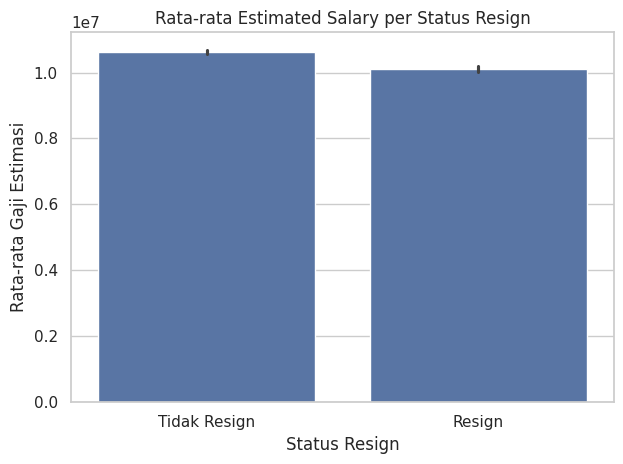

In [ ]:
# Visualisasi rata-rata gaji untuk masing-masing status resign
sns.barplot(x='target', y='estimated_salary', data=df)

# Memberi label dan judul
plt.xticks([0, 1], ['Tidak Resign', 'Resign'])
plt.ylabel("Rata-rata Gaji Estimasi")
plt.xlabel("Status Resign")
plt.title("Rata-rata Estimated Salary per Status Resign")
plt.tight_layout()
plt.show()

## DEPLOYMENT

In [ ]:
print(model_optimum)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('clf',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=1000, random_state=42))])


In [ ]:
import joblib
joblib.dump(model_optimum, 'model_pipeline_logreg.pkl')
print("Model pipeline Logistic Regression berhasil disimpan sebagai model_pipeline_logreg.pkl")

Model pipeline Logistic Regression berhasil disimpan sebagai model_pipeline_logreg.pkl


In [ ]:
df_original_for_imputation = pd.read_csv("aug_train.csv").drop(columns=['company_size', 'company_type','enrollee_id'])

Q1_cdi = df_original_for_imputation['city_development_index'].quantile(0.25)
Q3_cdi = df_original_for_imputation['city_development_index'].quantile(0.75)
IQR_cdi = Q3_cdi - Q1_cdi
lower_bound_cdi = Q1_cdi - 1.5 * IQR_cdi
upper_bound_cdi = Q3_cdi + 1.5 * IQR_cdi
outliers_cdi = ((df_original_for_imputation['city_development_index'] < lower_bound_cdi) | (df_original_for_imputation['city_development_index'] > upper_bound_cdi))
df_cleaned_for_imputation = df_original_for_imputation[~outliers_cdi].copy()


imputation_values = {}
cols_to_impute = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'last_new_job']
for col in cols_to_impute:
    if df_cleaned_for_imputation[col].dtype == "object":
        imputation_values[col] = df_cleaned_for_imputation[col].mode()[0]
    else:
        imputation_values[col] = df_cleaned_for_imputation[col].median()

joblib.dump(imputation_values, 'imputation_values.pkl')
print("Nilai imputasi berhasil disimpan:", imputation_values)

Nilai imputasi berhasil disimpan: {'gender': 'Male', 'enrolled_university': 'no_enrollment', 'education_level': 'Graduate', 'major_discipline': 'STEM', 'experience': '>20', 'last_new_job': '1'}


In [ ]:
# Ambil data fitur training original (sebelum encoding)
df_train_features_original = df_feature_extraction.loc[X_train.index].copy()

# Kolom kategorikal yang akan di-encode
categorical_columns = ['city', 'gender', 'relevent_experience',
                       'enrolled_university', 'education_level',
                       'major_discipline', 'experience', 'last_new_job']

label_encoders = {}

for col in categorical_columns:
    if col in df_train_features_original.columns:
        le = LabelEncoder()
        df_train_features_original[col] = df_train_features_original[col].astype(str)
        le.fit(df_train_features_original[col])
        label_encoders[col] = le

# Simpan ke file .pkl
joblib.dump(label_encoders, 'label_encoders.pkl')
print("LabelEncoder berhasil disimpan untuk input pengguna.")

LabelEncoder berhasil disimpan untuk input pengguna.


In [ ]:
model_feature_columns = list(X_train.columns)
joblib.dump(model_feature_columns, 'model_feature_columns.pkl')
print("Urutan kolom fitur model berhasil disimpan.")

Urutan kolom fitur model berhasil disimpan.
